# FINAL PROJECT GOOGLE ADVANCED DATA ANALYTICS CERTIFICATE

## OBJECTIVE
**Predict succesfully whether an employee of the company will stay or will leave**. For mor information on the tak see the **README.md** file at the root directory of this repository. 

Given the nature of the data, **binary supervised classification models** will be implemented for this purpose. 

# 1. PRELIMINARS: PACKAGES, MODULES AND DATA IMPORT

## IMPORT PYTHON REQUIREMENTS

In [1]:
#                        Other local code
import functions_classifiers as fnc
################################################################################
#                        Data manipulation
import numpy as np
import pandas as pd
# Regular expressions:
import re 
# Data sets:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
# data preprocessing:
import sklearn.preprocessing as prepro

################################################################################
#                        Statistics
from scipy import stats

################################################################################
#                         Data visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from xgboost import plot_importance

################################################################################
#                         Data modeling

# Models:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Grid Search Cross-Validation:
from sklearn.model_selection import GridSearchCV

################################################################################
#                         Model metrics:
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, PrecisionRecallDisplay
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

################################################################################

# Model export/import:
import pickle
import joblib # more efficient at serializing large numpy arrays                

################################################################################


## IMPORT DATA

In [2]:
# Import dataset
df = pd.read_csv('./data/HR_capstone_dataset.csv')
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Dataset Standardization

1. Set all feature names to small letters

In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
feature_names = list(df.columns)
new_column_names = list()
for feature in feature_names:
    temp_string = re.sub(r'[A-Z]', fnc.string_convert_to_lower, feature)
    new_column_names.append(temp_string)

df.columns = new_column_names
df.head(1)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   

   time_spend_company  work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   

  salary  
0    low

# 2. EXPLORATORY DATA ANALYSIS AND STATISTICAL CONSIDERATIONS

## Check for data integrity, consistency and plausibility

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


                            There seems to be no missing data in dataset

### Check for missing / NaN values per column

In [6]:
print(df.isna().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


### Check plausibility of descriptive statistics of features

In [7]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

            All values seem plausible but closer check required: data distributions and type (discrete/continuous)

#### Boxplots: quartiles of features

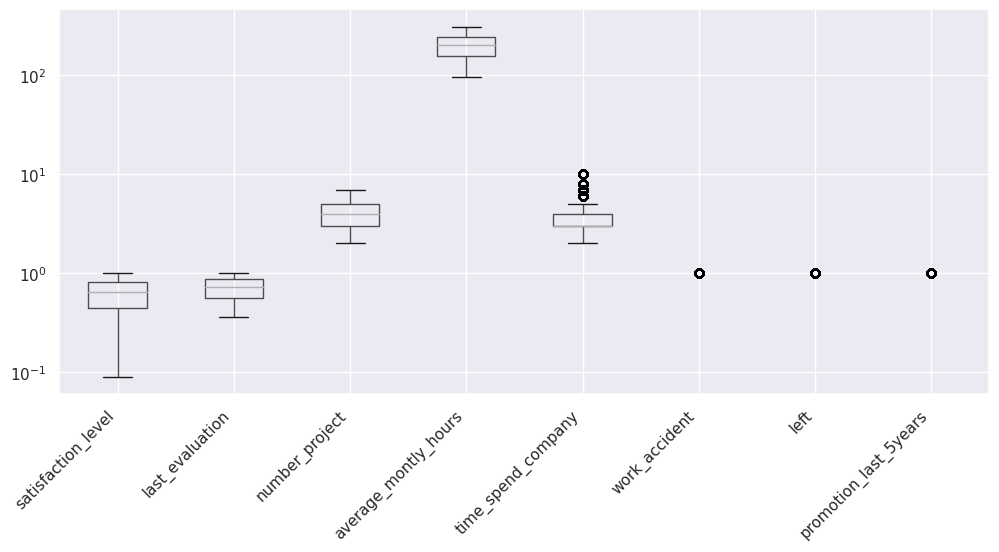

In [8]:
fnc.df_boxplot(df)

    The boxplots confirm data distribution for continuous variables seems reasonable within the expected ranges and with few outliers

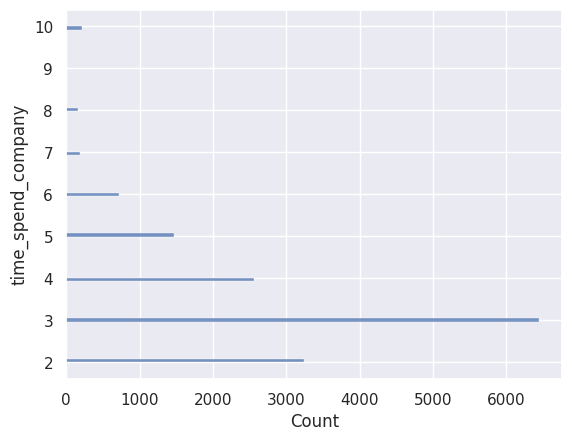

In [9]:
sns.histplot(data=df, y='time_spend_company')
plt.show()

### Check categories for discrete features: work_accident, left, promotion_last_5years

In [10]:
categorical_features = { 'department', 'work_accident', 'left', 'promotion_last_5years', 'salary'}
for feature in list(categorical_features):
    print('{}\n'.format(df[feature].value_counts(normalize=True)))

promotion_last_5years
0    0.978732
1    0.021268
Name: proportion, dtype: float64

work_accident
0    0.85539
1    0.14461
Name: proportion, dtype: float64

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

department
sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: proportion, dtype: float64

salary
low       0.487766
medium    0.429762
high      0.082472
Name: proportion, dtype: float64



    As expected all the categorical features are binary except number_project and department. The target feature 'left' is unbalanced with about 75/25 left/live ratio. 

## Data probability distributions: Histograms

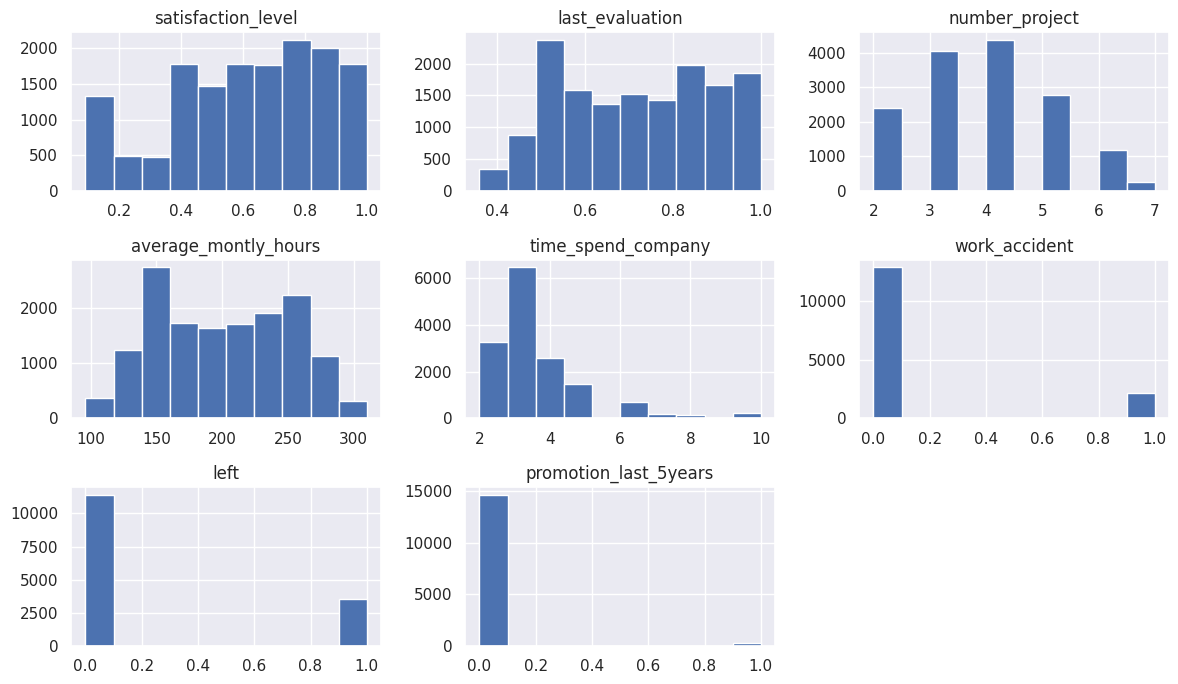

In [11]:
#import matplotlib
#matplotlib.rc_file_defaults()
sns.set()
df.hist(figsize=(12,7))
plt.tight_layout()
plt.show()

<ul>
    <li> Normal-like distribution:</li>
    <ul>
        <li>average_monthly_hours </li>
        <li> number_project </li>
    </ul>
    <li> Skewed distribution:
    <ul>
        <li> satisfaction_level: rather higher levels </li>
        <li> last_evaluation: rather highe levels </li>
        <li> time_spend_company: lower levels </li>
    </ul>
</ul>            

### Histograms log(data)

In [12]:
all_features = set(df.columns)
numerical_features = all_features - set(categorical_features)
numerical_features

{'average_montly_hours',
 'last_evaluation',
 'number_project',
 'satisfaction_level',
 'time_spend_company'}

In [13]:
list(numerical_features)

['time_spend_company',
 'satisfaction_level',
 'number_project',
 'last_evaluation',
 'average_montly_hours']

In [14]:
dflog = df[list(numerical_features)]
dflog = np.log(dflog)

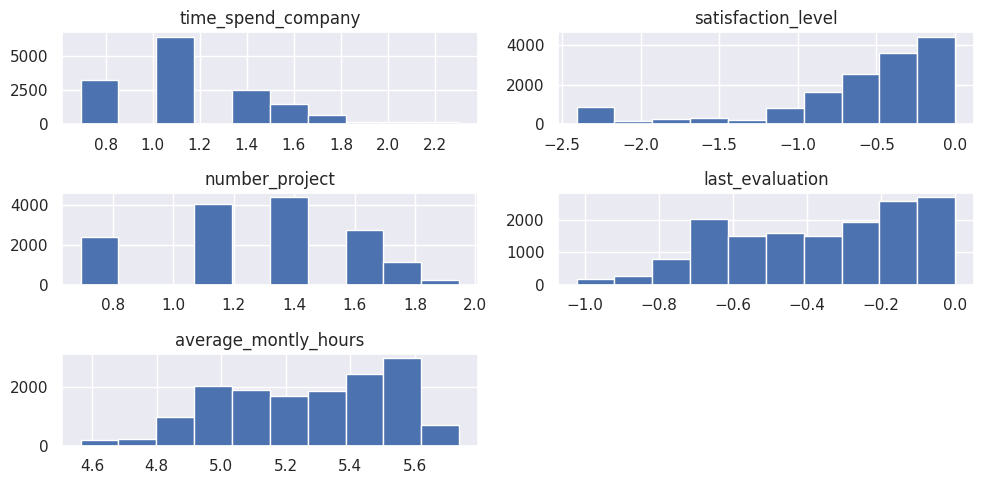

In [15]:
dflog.hist(figsize=(10,5))
plt.tight_layout()
plt.show()

### Histograms normalized to segments (bins)

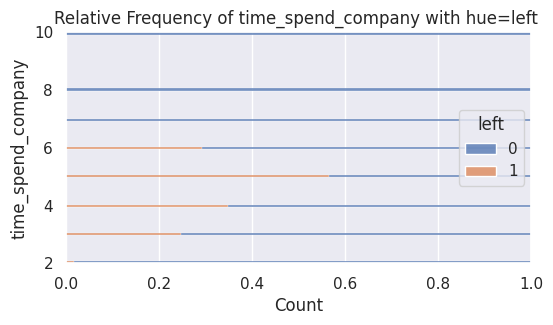

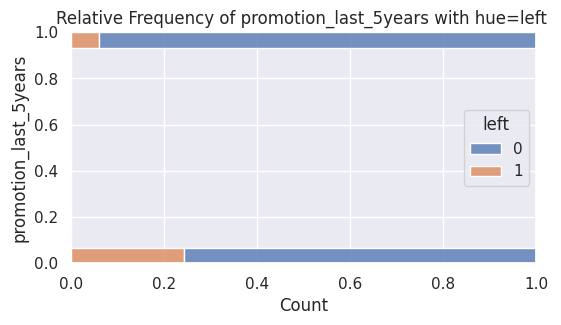

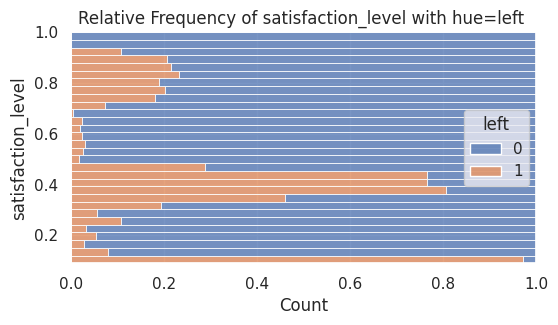

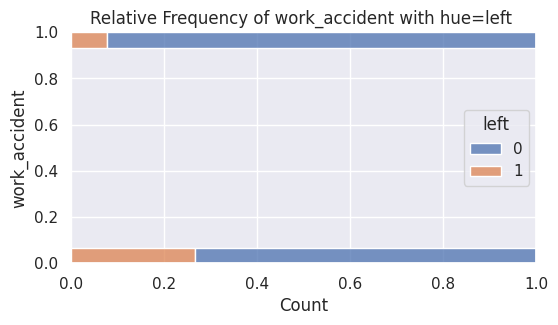

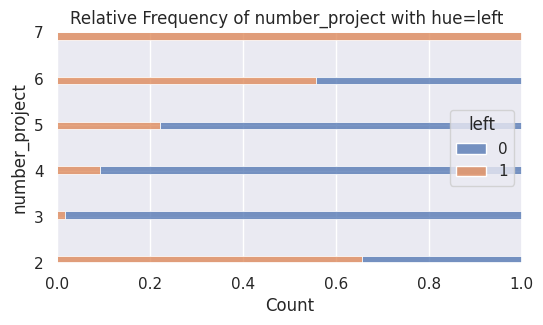

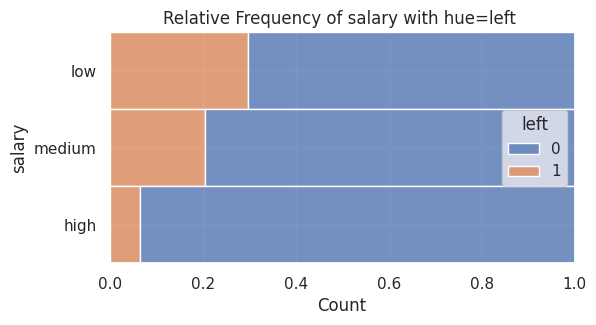

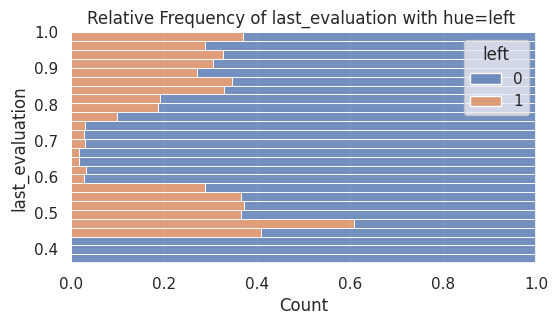

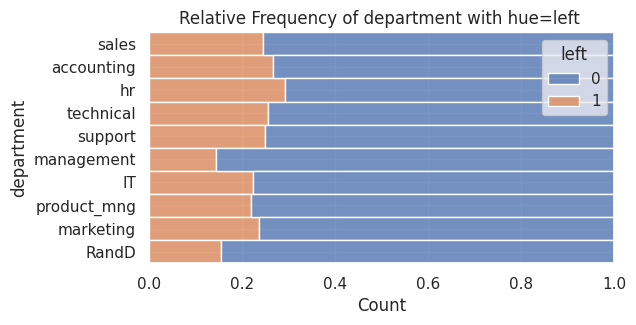

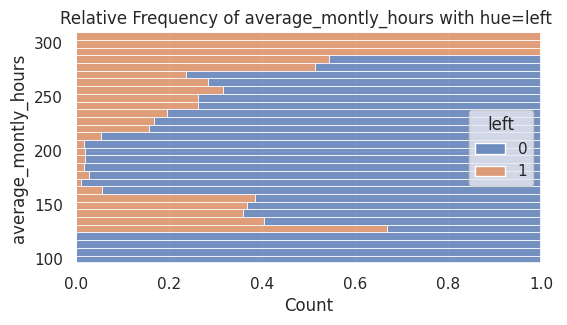

In [16]:
for feat in (all_features - set(['left'])):
    fnc.plothist_fill_hue(df, feat, 'left' )

Observable clear trends:
<ul>
    <li> average_monthly_hours: employees with very high averages leave to 100% </li>
    <li> number project: employess with too many projects leave to 100% </li>
    <li> salary: employyes with low salaries leave more than others but this accounts to ~20% leaves in that segement </li>
    <li> time_spend_company: long term employees (>= 7 years) stay to 100% </li>
</ul>

## Correlations (linearity dependences)

### Check for patterns

/home/diego/Documents/EDUCATION/LEARNING/IT/BIG_DATA/GOOGLE/Advanced_Data_Analytics_Certificate/workspaces/pg1/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


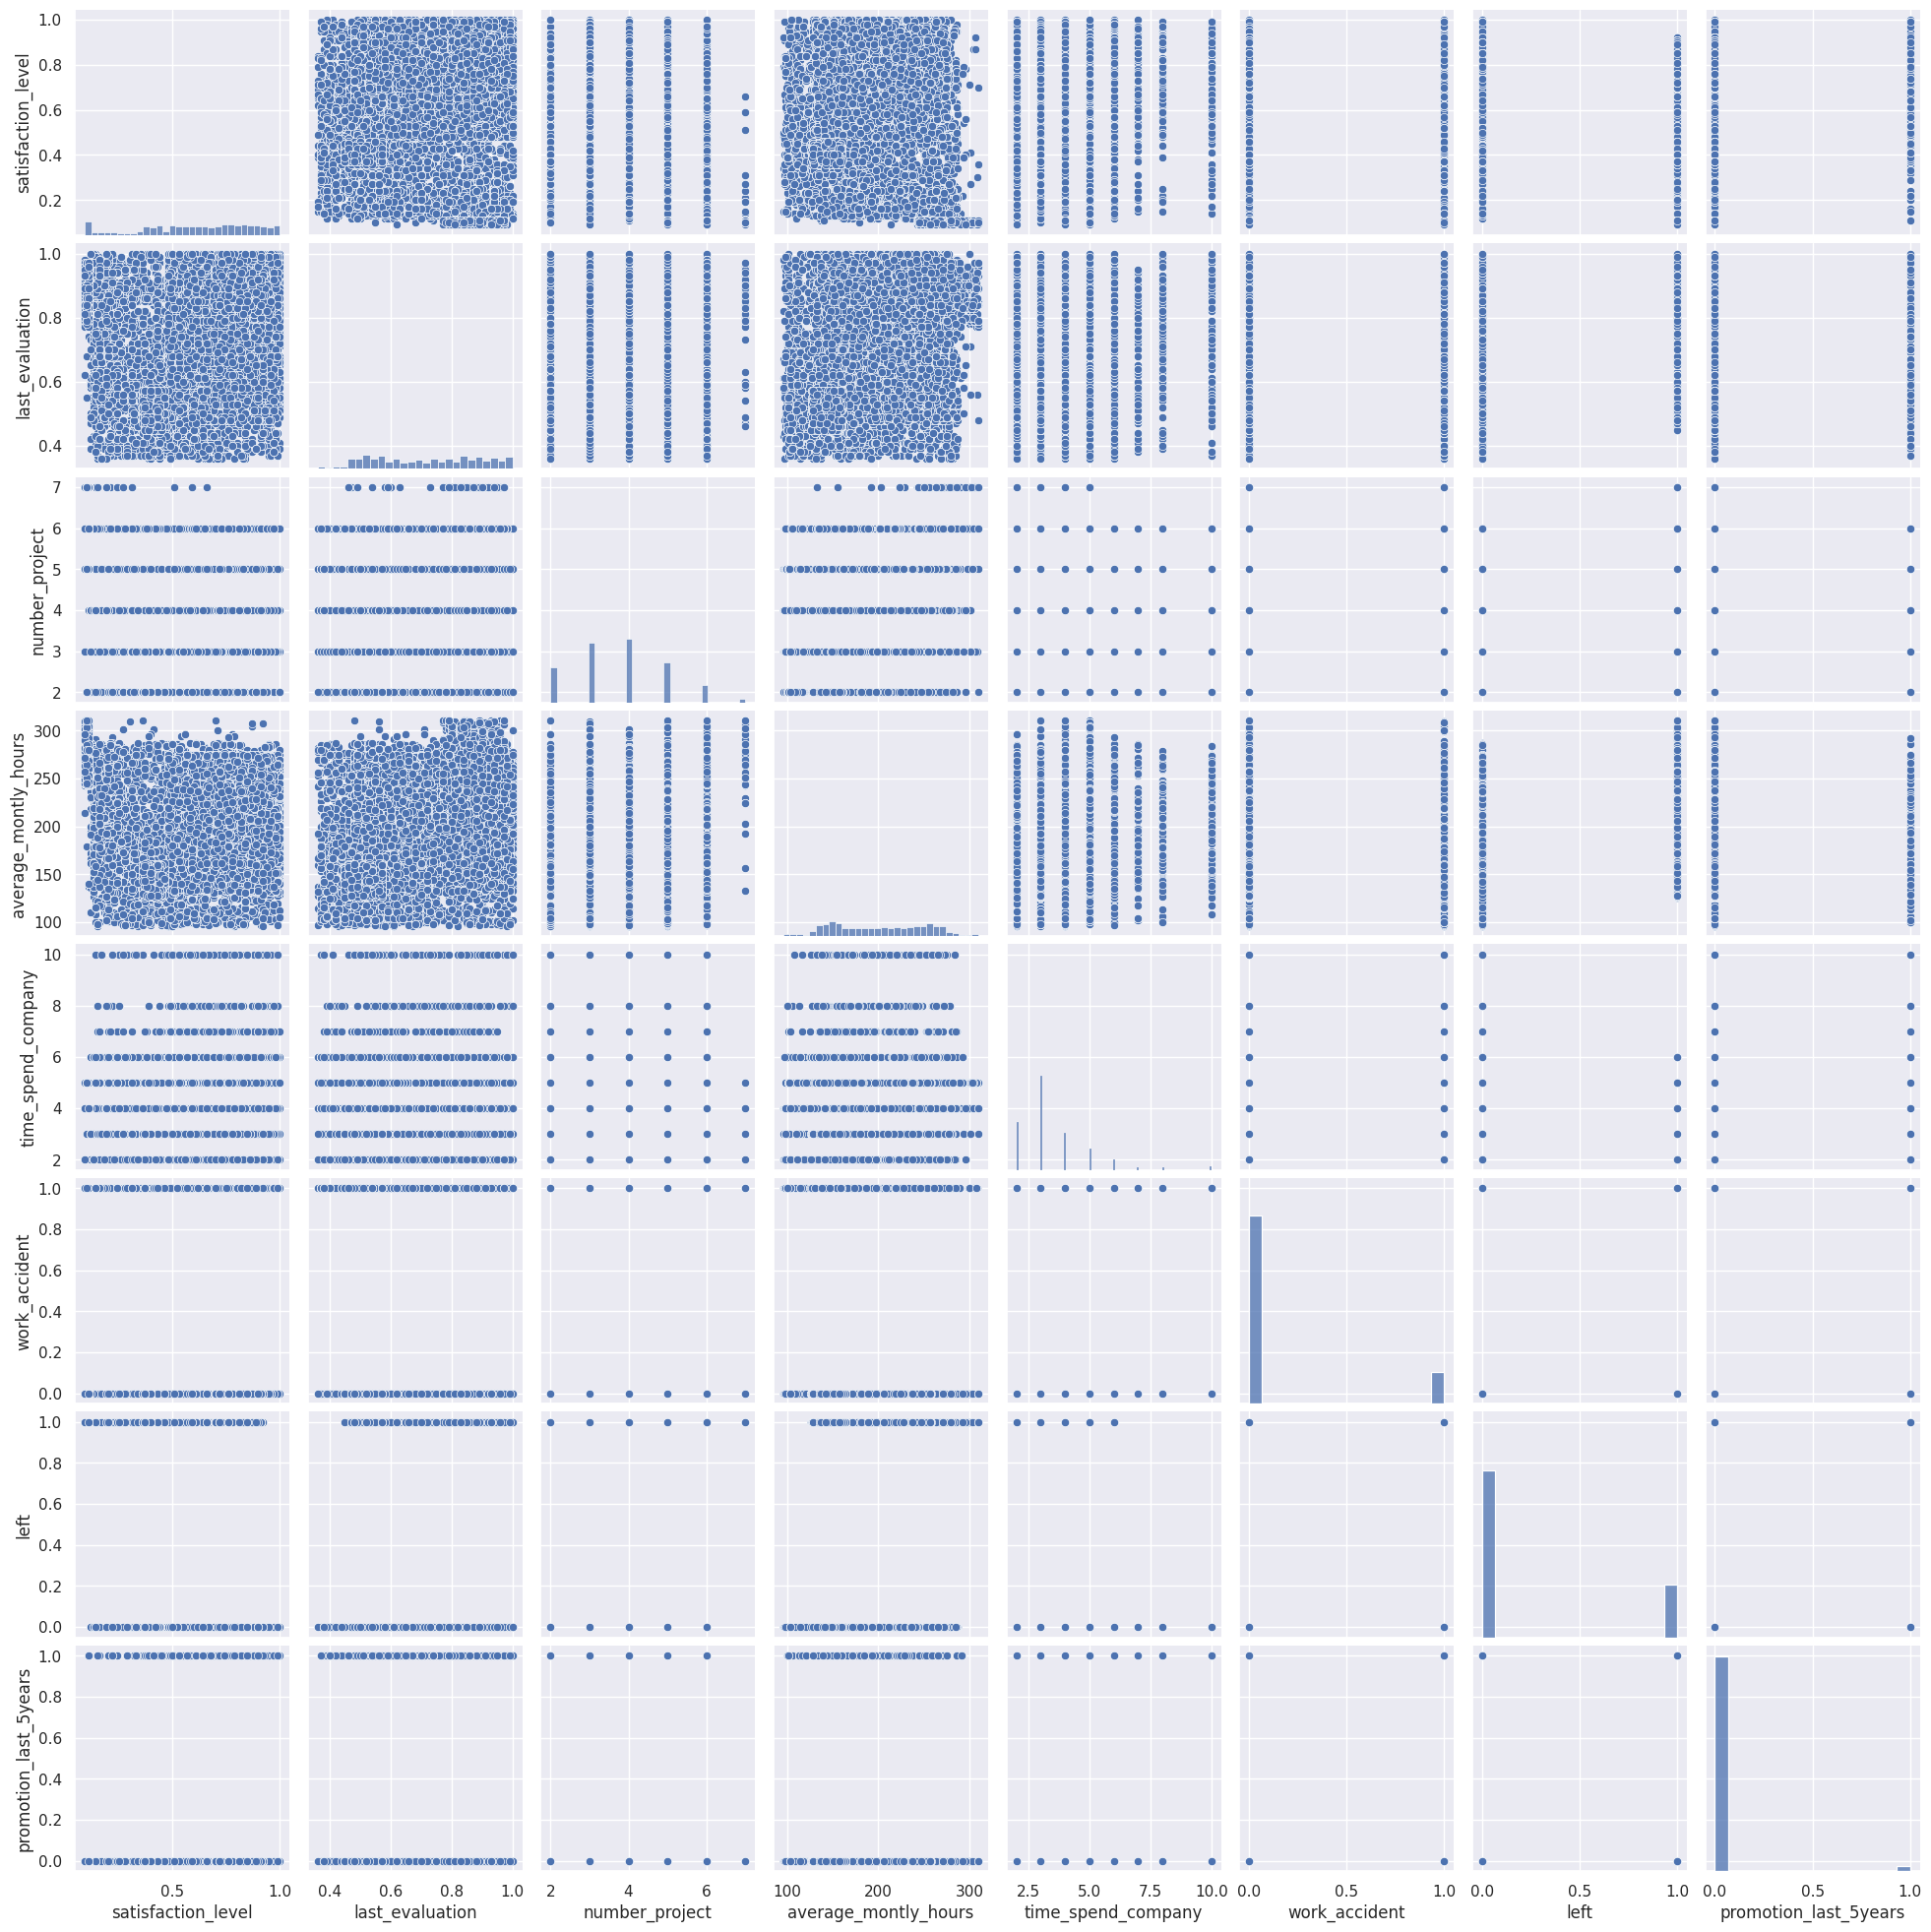

In [17]:
sns.pairplot(df)
plt.show()

### Investigate Specific Features

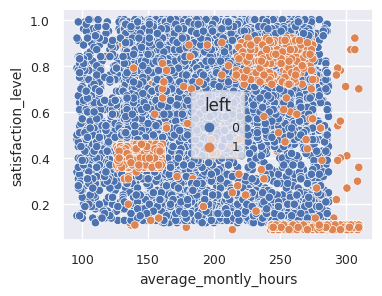

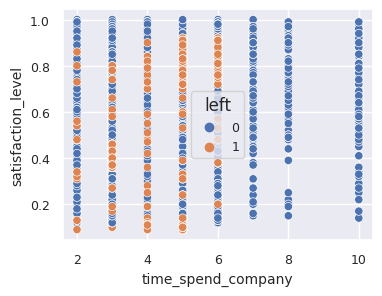

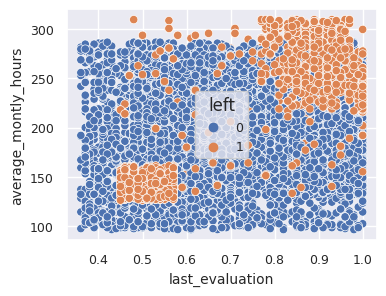

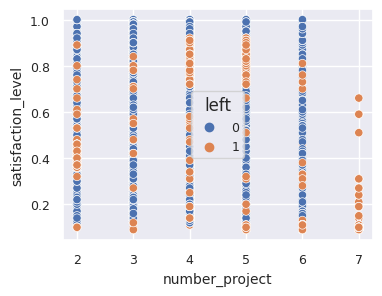

In [18]:
y_axis_feats = ['satisfaction_level', 'satisfaction_level', 'average_montly_hours', 'satisfaction_level']
x_axis_feats = ['average_montly_hours', 'time_spend_company', 'last_evaluation', 'number_project']
i=0
sns.set()
for i in range(0, len(x_axis_feats)):
    plt.figure(figsize=(4,3))
    #plt.rc('font', size=)
    plt.rc('axes', labelsize=10)
    plt.rc('xtick', labelsize=9)
    plt.rc('ytick', labelsize=9)
    plt.rc('legend', fontsize=9)
    fig = sns.scatterplot(data=df,
                    x=x_axis_feats[i],
                    y=y_axis_feats[i],
                    hue='left',
                    #style='left',
                    legend='full')
    sns.move_legend(fig, 'center')
    #plt.legend(loc='center') # in seaborn does not show the name of hue feature, use sns.move_legend
    #plt.title('Scatter plot with categories for \'left\'')
    plt.show()
    i+=1
matplotlib.rc_file_defaults()

### Correlation Matrix

In [19]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)
correlation_matrix['left'].sort_values(ascending=False)

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

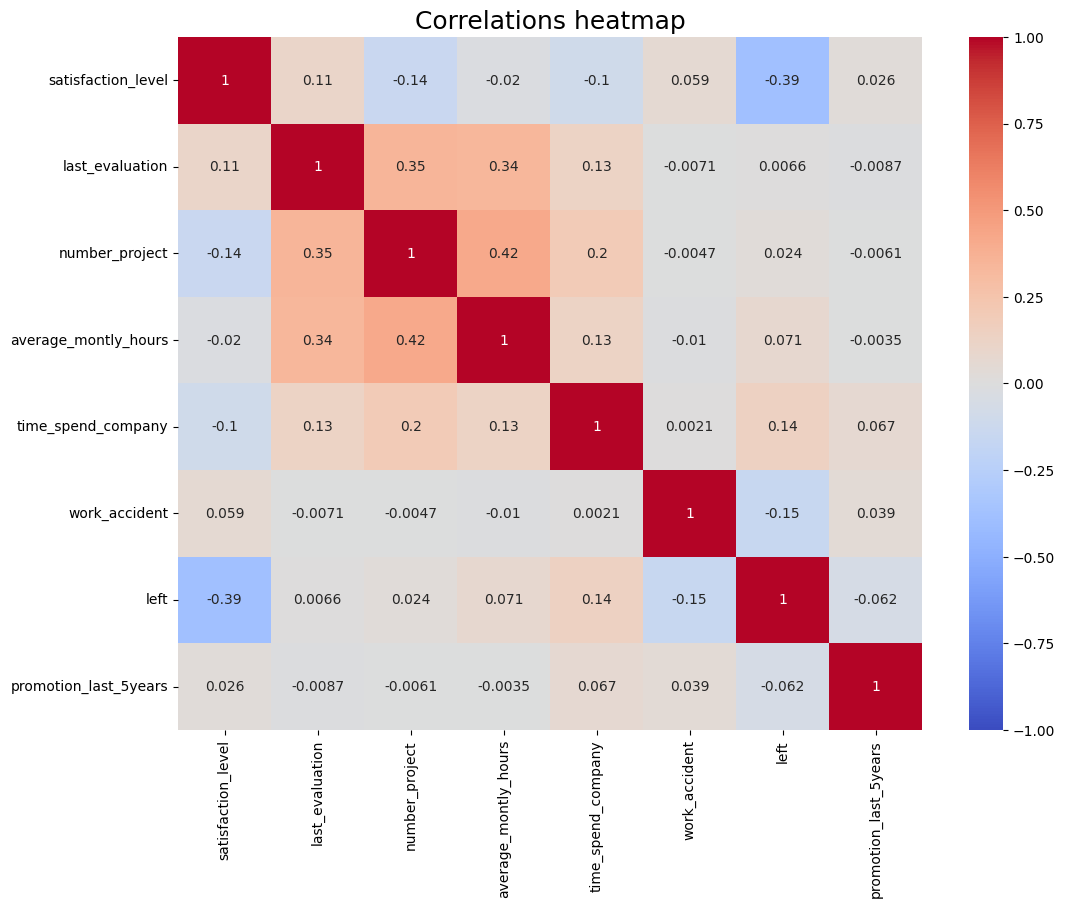

In [20]:
# Plot correlation heatmap
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(method='pearson', numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlations heatmap',fontsize=18)
plt.show();

<ul>
    <li>No siginificant colinearity among features is observed: All of them can be used with models with colinearity restrictions like logistic regression.</li>
    <li>Highest correlation among features: $average_monthly__hours - number__project: 0.42$</li>
    <li>Understandable proportionality of -0.39. $left(satisfaction__level)$.</li>
    <li> Proportionality of -0.15. Employees with accident tend not to leave. However work_accident is in reality a binary categorical variable, not a numerical one. Therefore this result cannot be regarded as valid. $left(work__accident)$</li>
</ul>

## Conclusions EDA

<ul>
    <li>No clear patterns can be distinguished in matrix of scatter plots other than almost uniform distributions</li>
    <li>There are no colinearity restrictions in the data: one could model with logistic regression</li>
    <li>No outliers issues</li>
    <li>No clear probability distributions observed for most variables</li>
</ul>

Next steps:
<ul>
    <li>Consider feature engineering</li>
    <li>Select model(s)</li>
</ul>

# 3. FEATURE ENGINEERING

## Closer Look at Feature Pairs

In [21]:
all_features

{'average_montly_hours',
 'department',
 'last_evaluation',
 'left',
 'number_project',
 'promotion_last_5years',
 'salary',
 'satisfaction_level',
 'time_spend_company',
 'work_accident'}

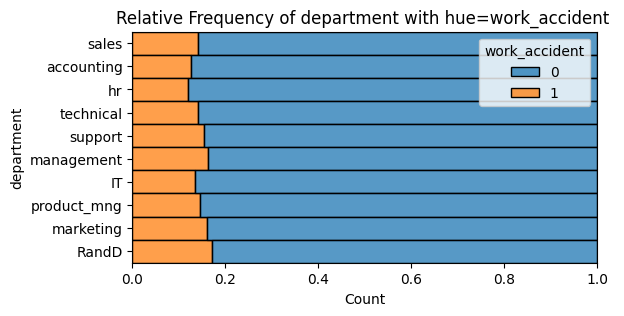

In [22]:
fnc.plothist_fill_hue(df, 'department', 'work_accident' )

                    No department is specially hit by work accidents

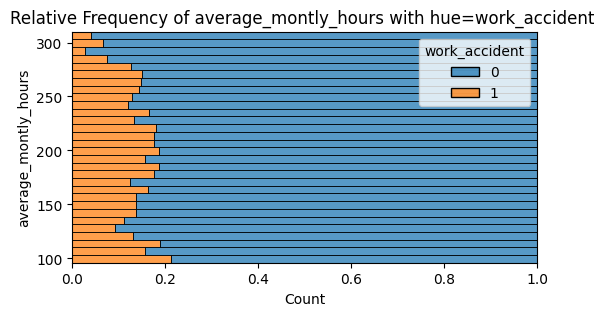

In [23]:
fnc.plothist_fill_hue(df, 'average_montly_hours', 'work_accident' )

    The amount of working hours does not seem to influence the accidents. Which branches are included in the data? Some specially prone to accidents?

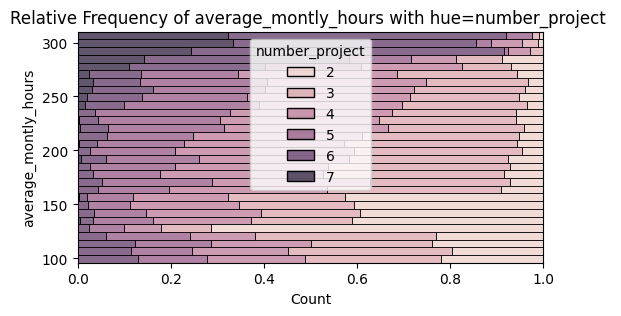

In [24]:
fnc.plothist_fill_hue(df, 'average_montly_hours', 'number_project' )

        As also seen in the correlation heatmap, there is a dependence (positive correlation 0.42) between the working hours and the number of projects an employee is working on.

        Let's create an 'overloaded' binary feature indicating whether an employee is overloaded with work and investigate this further.

## Create new Features

### **overloaded**

In [25]:
# Maks the data for overloaded feature:
temp_mask = (df['average_montly_hours'] >= 250) & (df['number_project'] >= 6)
# Store indices of overloaded employees:
overloaded_indices = df[temp_mask].index
overloaded_indices

Index([    2,    11,    20,    22,    30,    35,    38,    43,    44,    54,
       ...
       14930, 14933, 14963, 14964, 14972, 14975, 14979, 14991, 14993, 14997],
      dtype='int64', length=877)

In [26]:
# Save new feature column to data frame:
temp_series = pd.Series(0, index=np.arange(len(df)))
temp_series[overloaded_indices] = 1
df['overloaded'] = temp_series
df['overloaded'].value_counts()

overloaded
0    14122
1      877
Name: count, dtype: int64

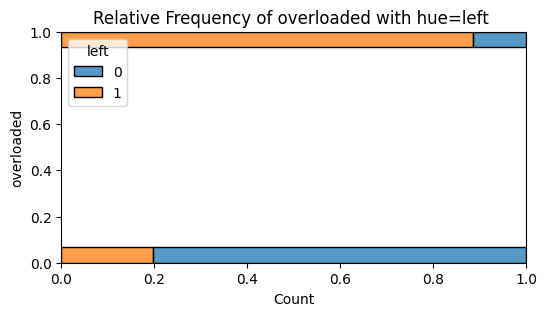

In [27]:
fnc.plothist_fill_hue(df, 'overloaded', 'left' )

        It looks that overloaded is a strong influence for leaving a company

### **overload_index**

In [28]:
max_hours = df['average_montly_hours'].max()
max_projs = df['number_project'].max()
df['overload_index'] = 0.5*(df['average_montly_hours']/max_hours + df['number_project']/max_projs)

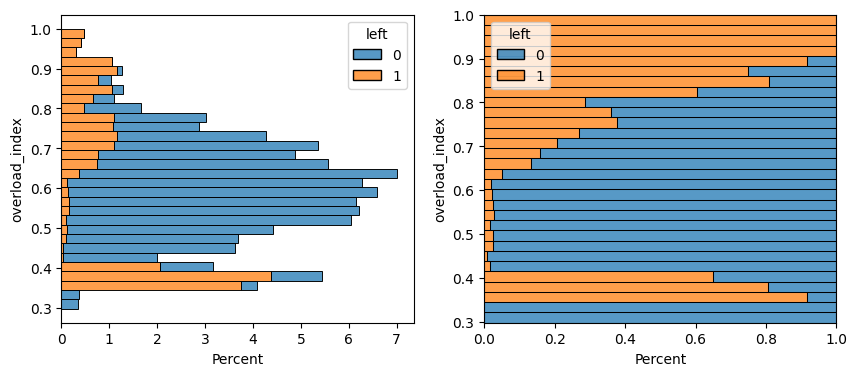

In [29]:
fig, axes =  plt.subplots(1,2, figsize=(10,4))
sns.histplot(data=df, y='overload_index', hue='left', bins=30, stat='percent', multiple='stack', ax=axes[0])
sns.histplot(data=df, y='overload_index', hue='left', bins=30, stat='percent', multiple='fill', ax=axes[1])
plt.show()

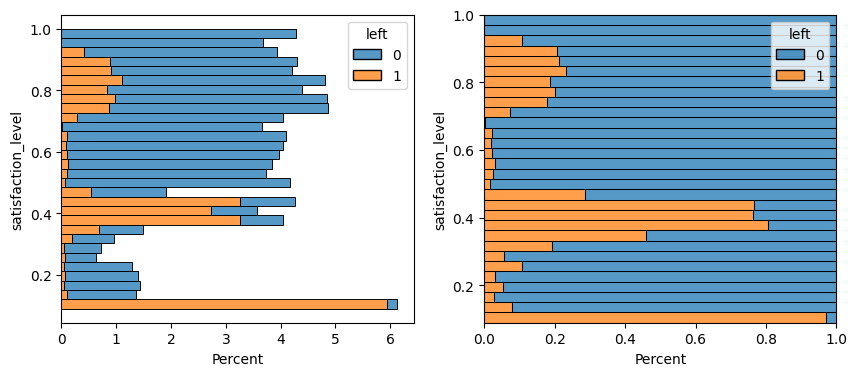

In [30]:
fig, axes =  plt.subplots(1,2, figsize=(10,4))
sns.histplot(data=df, y='satisfaction_level', hue='left', bins=30, stat='percent', multiple='stack', ax=axes[0])
sns.histplot(data=df, y='satisfaction_level', hue='left', bins=30, stat='percent', multiple='fill', ax=axes[1])
plt.show()

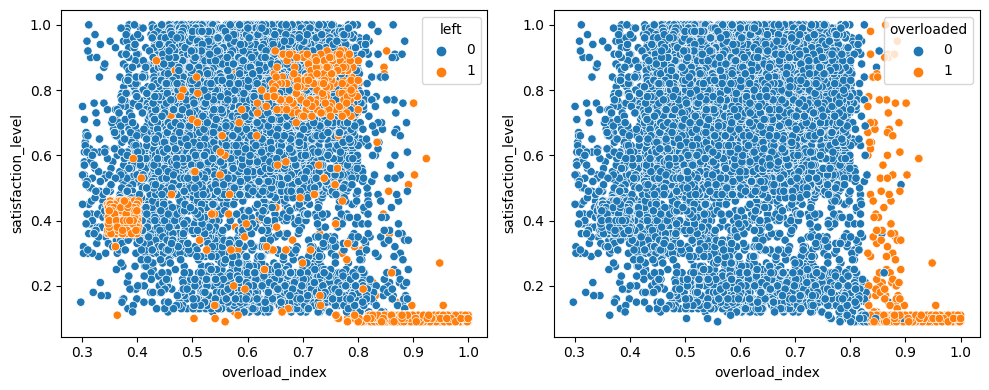

In [31]:
fig, axes =  plt.subplots(1,2, figsize=(10,4))
sns.scatterplot(data=df, y='satisfaction_level', x='overload_index', hue='left', ax=axes[0])
sns.scatterplot(data=df, y='satisfaction_level', x='overload_index', hue='overloaded', ax=axes[1])
plt.tight_layout()
plt.show()

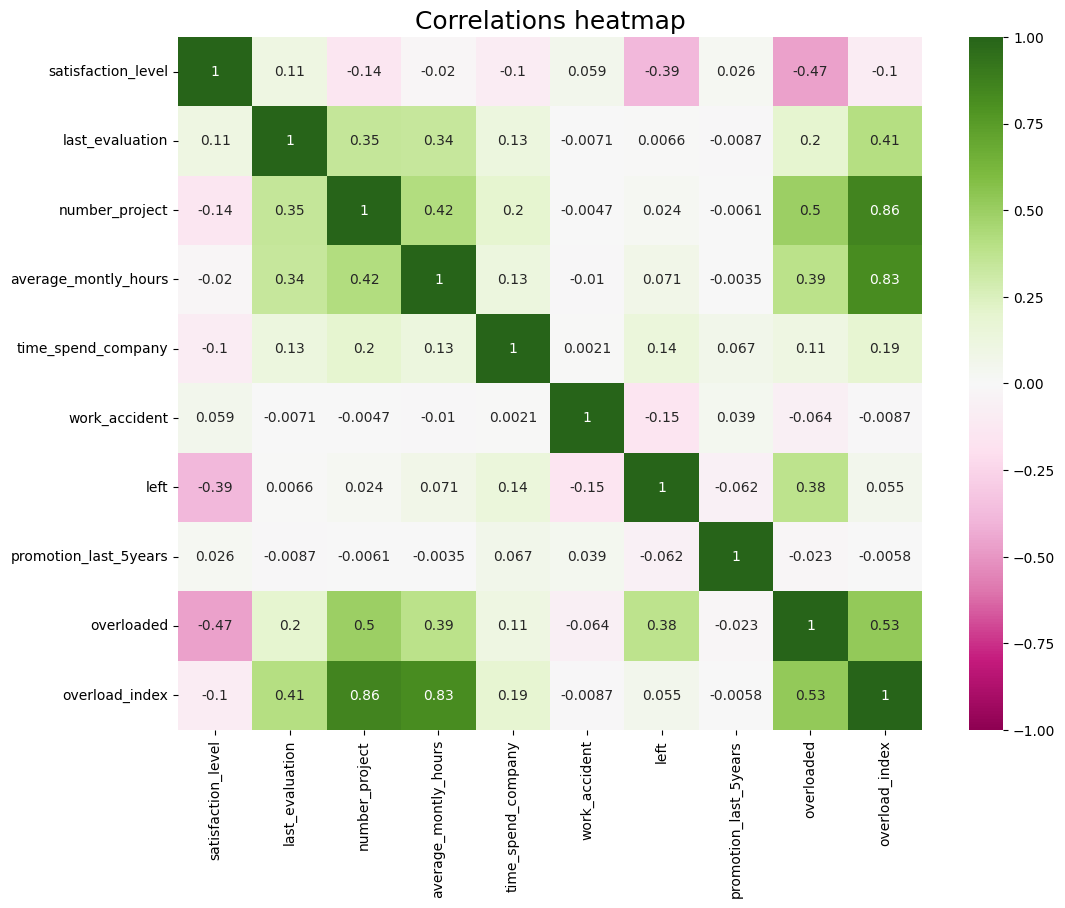

In [32]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)
# Plot correlation heatmap
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(method='pearson', numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='PiYG', center=0.0)
plt.title('Correlations heatmap',fontsize=18)
plt.show();


<ul>
    <li>In the overloaded group about 90% of the employess left. In the not-overloaded group only 20%</li>
    <li>In the scatter plot satisfaction_level vs. overload_index one coul think there are 3 groups who left:</li>
    <ol>
        <li>Extreme overloaded and unhappy employees</li>
        <li>Bored employees: rather unhappy and rather underloaded (around (0.4, 0.4))</li>
        <li>Employees looking for more: over average happiness and load without being extreme overloaded (around (0.8, 0.8))</li>
    </ol>
</ul>

# 4. PRELIMINARY MODEL SELECTION


<p>
    From the analysis in EDA and in feature engineering it seems plausible to have a good explainable model for the data. <b>I choose a logistic regression</b>. This algorithm can work with categorical features so we do not need to encode categoricals. Feature scaling might be better altough the feature ranges are not quite different. From the previous analysis it was clear colinearity among features allows such modeling. <b>I will include the categorical feature 'oveloaded' in the analysis but not 'overload_index'</b>. The first was set based on thresholds and the second on an arithmeic calculation from average_hours and number_project.
</p>

# 5. MODEL BUILDING: LOGISTIC CLASSIFICATION
I prefer a logistic classifer over other models because with it one can have an explainable model in terms of the input features

## Check existing list of variables

In [33]:
all_features.add('overloaded')
categorical_features.add('overloaded')

In [34]:
categorical_features

{'department',
 'left',
 'overloaded',
 'promotion_last_5years',
 'salary',
 'work_accident'}

In [35]:
numerical_features

{'average_montly_hours',
 'last_evaluation',
 'number_project',
 'satisfaction_level',
 'time_spend_company'}

In [36]:
len(numerical_features) +len(categorical_features) == len(all_features)

True

## Encode Categorical Features 

In [37]:
fnc.column_encode(df, 'salary', {'low':1, 'medium':2, 'high':3})
fnc.column_encode(df, 'department', {'sales':0, 'technical':1, 'support':3, 'IT':4, 'product_mng':5, 'marketing':6,
                                     'RandD':7, 'accounting':8, 'hr':9, 'management':10})

Column transform success with {'low': 1, 'medium': 2, 'high': 3} and proportions
 salary
low       0.487766
medium    0.429762
high      0.082472
Name: proportion, dtype: float64

Column transform success with {'sales': 0, 'technical': 1, 'support': 3, 'IT': 4, 'product_mng': 5, 'marketing': 6, 'RandD': 7, 'accounting': 8, 'hr': 9, 'management': 10} and proportions
 department
sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: proportion, dtype: float64



## Remove outliers 

In [38]:
print(numerical_features)

{'time_spend_company', 'satisfaction_level', 'number_project', 'last_evaluation', 'average_montly_hours'}


In [39]:
#df_nooutliers = drop_outliers(df, ['time_spend_company'])
df_nooutliers = fnc.drop_outliers(df, list(numerical_features), quantile_low=0.25, quantile_hi=0.80, iqr_factor = 1.5)

Outliers for time_spend_company:
 max original = 1.000e+01
 max_nooutliers = 5.000e+00
 min original = 2.000e+00
 min_nooutliers = 2.000e+00
Lower limit is: 1.5e+00
Upper limit is: 5.5e+00
dropped 1282 rows from data frame

Outliers for satisfaction_level:
 max original = 1.000e+00
 max_nooutliers = 1.000e+00
 min original = 9.000e-02
 min_nooutliers = 9.000e-02
Lower limit is: 0.0e+00
Upper limit is: 1.5e+00
dropped 0 rows from data frame

Outliers for number_project:
 max original = 7.000e+00
 max_nooutliers = 7.000e+00
 min original = 2.000e+00
 min_nooutliers = 2.000e+00
Lower limit is: 0.0e+00
Upper limit is: 8.0e+00
dropped 0 rows from data frame

Outliers for last_evaluation:
 max original = 1.000e+00
 max_nooutliers = 1.000e+00
 min original = 3.600e-01
 min_nooutliers = 3.600e-01
Lower limit is: 6.5e-02
Upper limit is: 1.4e+00
dropped 0 rows from data frame

Outliers for average_montly_hours:
 max original = 3.100e+02
 max_nooutliers = 3.100e+02
 min original = 9.600e+01
 min_

## Remove the target variable 'left' from the list of features

In [40]:
df_nooutliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13717 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     13717 non-null  float64
 1   last_evaluation        13717 non-null  float64
 2   number_project         13717 non-null  int64  
 3   average_montly_hours   13717 non-null  int64  
 4   time_spend_company     13717 non-null  int64  
 5   work_accident          13717 non-null  int64  
 6   left                   13717 non-null  int64  
 7   promotion_last_5years  13717 non-null  int64  
 8   department             13717 non-null  object 
 9   department_encoded     13717 non-null  int64  
 10  salary                 13717 non-null  object 
 11  salary_encoded         13717 non-null  int64  
 12  overloaded             13717 non-null  int64  
 13  overload_index         13717 non-null  float64
dtypes: float64(3), int64(9), object(2)
memory usage: 1.6+ MB


In [41]:
X_features = all_features - {'left'}
X_features

{'average_montly_hours',
 'department',
 'last_evaluation',
 'number_project',
 'overloaded',
 'promotion_last_5years',
 'salary',
 'satisfaction_level',
 'time_spend_company',
 'work_accident'}

## Review Values for Each Column
For numerical data: min, mean, max. For categorical data: normalized counts unique values.

In [42]:
for feat in list(X_features):
    if (df[feat].dtype == 'int') or (df[feat].dtype == 'float'):
         print('{}:\n min={} mean={:.2f} max={}\n'.format(feat, df[feat].min(), df[feat].mean(), df[feat].max()))
    else:
        print(df[feat].value_counts(normalize=True))
        print('\n')
    

time_spend_company:
 min=2 mean=3.50 max=10

promotion_last_5years:
 min=0 mean=0.02 max=1

satisfaction_level:
 min=0.09 mean=0.61 max=1.0

overloaded:
 min=0 mean=0.06 max=1

work_accident:
 min=0 mean=0.14 max=1

number_project:
 min=2 mean=3.80 max=7

salary
low       0.487766
medium    0.429762
high      0.082472
Name: proportion, dtype: float64


last_evaluation:
 min=0.36 mean=0.72 max=1.0

department
sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: proportion, dtype: float64


average_montly_hours:
 min=96 mean=201.05 max=310



In [43]:
df_nooutliers.head(2)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
2                0.11             0.88               7                   272   

   time_spend_company  work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
2                   4              0     1                      0      sales   

   department_encoded  salary  salary_encoded  overloaded  overload_index  
0                   0     low               1           0        0.396083  
2                   0  medium               2           1        0.938710

## Split Data into Train, Validation and Test Sets

In [44]:
print(numerical_features)
print(X_features)

{'time_spend_company', 'satisfaction_level', 'number_project', 'last_evaluation', 'average_montly_hours'}
{'time_spend_company', 'promotion_last_5years', 'satisfaction_level', 'overloaded', 'work_accident', 'number_project', 'salary', 'last_evaluation', 'department', 'average_montly_hours'}


In [45]:
X_features = X_features - {'department', 'salary'}
X_features.add('department_encoded')
X_features.add('salary_encoded')
print(X_features)

{'time_spend_company', 'promotion_last_5years', 'satisfaction_level', 'overloaded', 'work_accident', 'department_encoded', 'number_project', 'salary_encoded', 'last_evaluation', 'average_montly_hours'}


In [46]:
X, y = fnc.splitset_train_validation_test( df_nooutliers[list(X_features)], df_nooutliers['left'], test_size=0.2, validation_size=0.2, )

train set size: 0.5999125173142815 of original data set
Value distribution in y vector: 
 left
0    0.754891
1    0.245109
Name: proportion, dtype: float64

valid set size: 0.20004374134285924 of original data set
Value distribution in y vector: 
 left
0    0.755102
1    0.244898
Name: proportion, dtype: float64

test set size: 0.20004374134285924 of original data set
Value distribution in y vector: 
 left
0    0.754738
1    0.245262
Name: proportion, dtype: float64



## Scale Data for Model Logistic Regression

In [47]:
pd.Series(list(X_features))

0       time_spend_company
1    promotion_last_5years
2       satisfaction_level
3               overloaded
4            work_accident
5       department_encoded
6           number_project
7           salary_encoded
8          last_evaluation
9     average_montly_hours
dtype: object

In [48]:
pd.Series(X['train'].columns)


0       time_spend_company
1    promotion_last_5years
2       satisfaction_level
3               overloaded
4            work_accident
5       department_encoded
6           number_project
7           salary_encoded
8          last_evaluation
9     average_montly_hours
dtype: object

In [49]:
X['train'][list(X_features)]

time_spend_company  promotion_last_5years  satisfaction_level  \
2273                    3                      0                0.63   
9686                    3                      0                0.55   
14348                   3                      0                0.42   
9396                    5                      0                0.47   
5143                    2                      0                0.98   
...                   ...                    ...                 ...   
9549                    2                      0                0.39   
222                     3                      0                0.37   
11781                   3                      0                0.51   
7164                    3                      0                0.78   
12946                   4                      0                0.86   

       overloaded  work_accident  department_encoded  number_project  \
2273            0              0                   4               4   
9686            0              0                   5               4   
14348           0              0                  10               2   
9396            0              0                   0               6   
5143            0              0                   9               3   
...           ...            ...                 ...             ...   
9549            0              0                   6               2   
222             0              0                   5               2   
11781           0              0                   5               2   
7164            0              0                   4               3   
12946           0              0                   3               3   

       salary_encoded  last_evaluation  average_montly_hours  
2273                1             0.93                   201  
9686                2             0.90                   206  
14348               1             0.48                   129  
9396                2             0.39                   215  
5143                1             0.61                   226  
...               ...              ...                   ...  
9549                3             0.39                   131  
222                 1             0.51                   153  
11781               1             0.71                   180  
7164                1             0.99                   174  
12946               3             0.64                   245  

[8229 rows x 10 columns]

In [50]:
lX_features = list(X_features)
scaler = prepro.MinMaxScaler().fit(X['train'][lX_features])
X['train_scaled'] = pd.DataFrame(scaler.transform(X['train'][lX_features]))
X['train_scaled'].columns = lX_features

In [51]:
X['train_scaled'].describe()

time_spend_company  promotion_last_5years  satisfaction_level  \
count         8229.000000            8229.000000         8229.000000   
mean             0.390691               0.018107            0.575921   
std              0.304860               0.133345            0.272220   
min              0.000000               0.000000            0.000000   
25%              0.333333               0.000000            0.384615   
50%              0.333333               0.000000            0.604396   
75%              0.666667               0.000000            0.802198   
max              1.000000               1.000000            1.000000   

        overloaded  work_accident  department_encoded  number_project  \
count  8229.000000    8229.000000         8229.000000     8229.000000   
mean      0.060032       0.136833            0.320890        0.357808   
std       0.237560       0.343692            0.312419        0.247474   
min       0.000000       0.000000            0.000000        0.000000   
25%       0.000000       0.000000            0.000000        0.200000   
50%       0.000000       0.000000            0.300000        0.400000   
75%       0.000000       0.000000            0.500000        0.600000   
max       1.000000       1.000000            1.000000        1.000000   

       salary_encoded  last_evaluation  average_montly_hours  
count     8229.000000      8229.000000           8229.000000  
mean         0.285697         0.554240              0.489079  
std          0.314209         0.268255              0.233467  
min          0.000000         0.000000              0.000000  
25%          0.000000         0.312500              0.280374  
50%          0.000000         0.562500              0.481308  
75%          0.500000         0.796875              0.696262  
max          1.000000         1.000000              1.000000

In [52]:
X['train_scaled'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8229 entries, 0 to 8228
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time_spend_company     8229 non-null   float64
 1   promotion_last_5years  8229 non-null   float64
 2   satisfaction_level     8229 non-null   float64
 3   overloaded             8229 non-null   float64
 4   work_accident          8229 non-null   float64
 5   department_encoded     8229 non-null   float64
 6   number_project         8229 non-null   float64
 7   salary_encoded         8229 non-null   float64
 8   last_evaluation        8229 non-null   float64
 9   average_montly_hours   8229 non-null   float64
dtypes: float64(10)
memory usage: 643.0 KB


### Check features:

In [53]:
X_original = set(df.columns) - {'left'}
X_new = set(X['train_scaled'].columns)
X_original - X_new


{'department', 'overload_index', 'salary'}

## Logistic Regression

In [54]:
logistic_regression = dict()
logistic_regression['model'] = LogisticRegression(penalty='l2', max_iter=100, verbose=1, n_jobs=2, random_state=54)

In [55]:
print(X.keys())
print(y.keys())

dict_keys(['test', 'train', 'valid', 'train_scaled'])
dict_keys(['test', 'train', 'valid'])


### Fit Data

In [56]:
%%time
logistic_regression['model'].fit(X['train_scaled'], y['train'])

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70391D+03    |proj g|=  2.09750D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     27     29      1     0     0   1.167D-02   2.831D+03
  F =   2830.9310867260524     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
CPU times: user 14.1 ms, sys: 32.5 ms, total: 46.7 ms
Wall time: 576 ms


 This problem is unconstrained.


LogisticRegression(n_jobs=2, random_state=54, verbose=1)

# 6. MODEL EVALUATION: LOGISTIC CLASSIFICATION
Evaluate the model logstic classifier on validation set

## Logistic Regression

### Get Feature Importances and Coefficients in Model   $log{(P(y=1) \over P(y=0)} = \vec \theta * \vec X$

Explanation:
theta_i provides the specific contribution of feature i to the
variation    of log(odds) or log(P(Y=1) / P(Y=0)) in the equation:

             log(odds) = theta_vector dot X_vector

    The absolute value of theta provides a measure of the feature importance in the model


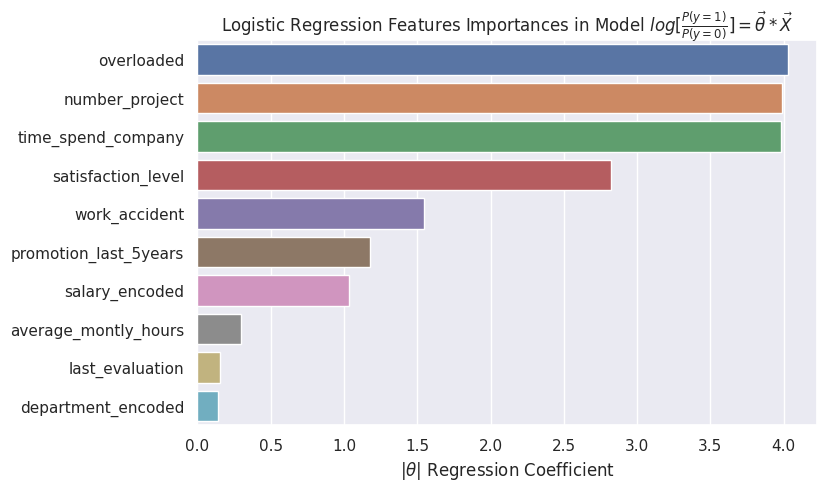

$\theta$  $|\theta|$
overloaded             4.029583    4.029583
number_project        -3.991510    3.991510
time_spend_company     3.982608    3.982608
satisfaction_level    -2.825021    2.825021
work_accident         -1.545698    1.545698
promotion_last_5years -1.179621    1.179621
salary_encoded        -1.035034    1.035034
average_montly_hours  -0.295025    0.295025
last_evaluation       -0.154976    0.154976
department_encoded    -0.141118    0.141118

In [57]:
logistic_regression['coefficient'] = fnc.logistic_regression_feature_coeff_importance(logistic_regression['model'])
logistic_regression['coefficient']

### Evaluate on Validation Set

#### Predict on Validation Set

In [58]:
X['valid_scaled'] =  pd.DataFrame(scaler.transform(X['valid'][lX_features]))
X['valid_scaled'].columns = lX_features
X['valid_scaled'].head(2)

time_spend_company  promotion_last_5years  satisfaction_level  overloaded  \
0            0.666667                    0.0            0.527473         1.0   
1            1.000000                    0.0            0.890110         0.0   

   work_accident  department_encoded  number_project  salary_encoded  \
0            0.0                 0.0             0.8             0.5   
1            0.0                 0.3             0.6             0.0   

   last_evaluation  average_montly_hours  
0            0.875              0.799065  
1            1.000              0.584112

In [59]:
X['valid_scaled'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744 entries, 0 to 2743
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time_spend_company     2744 non-null   float64
 1   promotion_last_5years  2744 non-null   float64
 2   satisfaction_level     2744 non-null   float64
 3   overloaded             2744 non-null   float64
 4   work_accident          2744 non-null   float64
 5   department_encoded     2744 non-null   float64
 6   number_project         2744 non-null   float64
 7   salary_encoded         2744 non-null   float64
 8   last_evaluation        2744 non-null   float64
 9   average_montly_hours   2744 non-null   float64
dtypes: float64(10)
memory usage: 214.5 KB


In [60]:
logistic_regression['y_valid_predict'] = logistic_regression['model'].predict(X['valid_scaled'])


#### Get Prediction Scores on Validation Set

In [61]:
logistic_regression['valid_scores'] = fnc.binary_classifier_scores(y_reference=y['valid'], y_prediction=logistic_regression['y_valid_predict'])
logistic_regression['valid_scores']

f1_score  accuracy_score  precision_score  recall_score
0  0.635906        0.841837         0.728846      0.563988

In [62]:
y['train'].value_counts(normalize=True)

left
0    0.754891
1    0.245109
Name: proportion, dtype: float64

<p>
    Scores of the model are decent; however the recall, which indicates the degree of false negatives (FN) is rather low.  In this case we would prefer a higher recall than a higher precision because we want to detect as many employees willing to quit as possible.
    The fact that the data sets are unbalanced (25:75 left:stay) was not considered in the previous model. This could be a parameter to tune the model. However before continuing, lets check the requirement of linearity of $y$ on $log(odds)$ $odd=P(y=1)/P(y=0)$ for the logistic regression.
</p>    

### Check Linearity Requirement of $y$ on $log(odds)$ for Logistic Regression:  $odd=P(y=1)/P(y=0)$  

#### Get the calculated probabilities of the trained model:

In [63]:
logistic_regression['probability'] = fnc.logistic_regression_probabilities(logistic_regression['model'], X['train_scaled'])
logistic_regression['probability'].head(2)

P_0       P_1
0  0.887523  0.112477
1  0.912822  0.087178

#### Calculate log(odds) or logits from the probabilities and check linearity requirement  $log{(P(y=1) \over P(y=0)} = \vec \theta * \vec X$

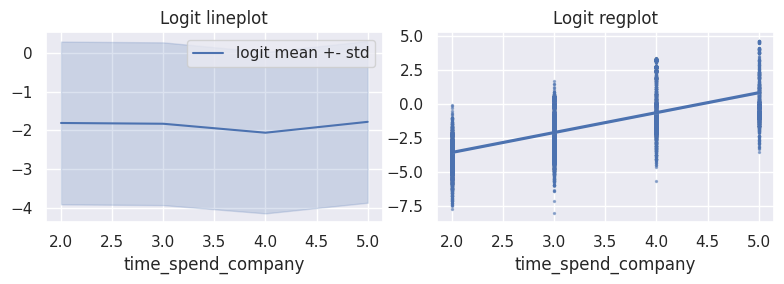

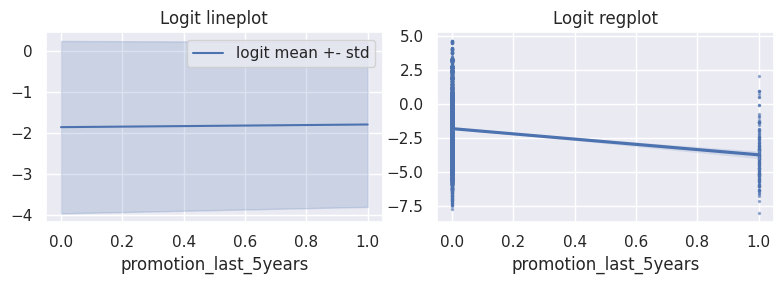

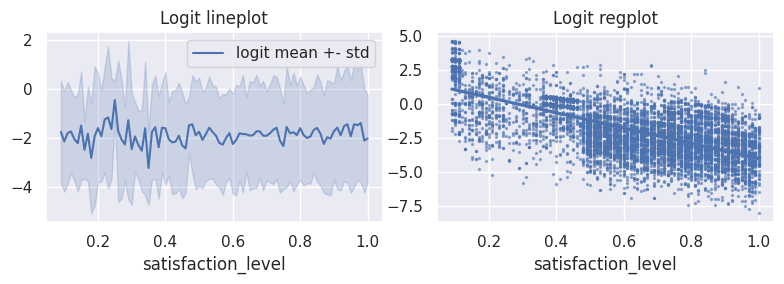

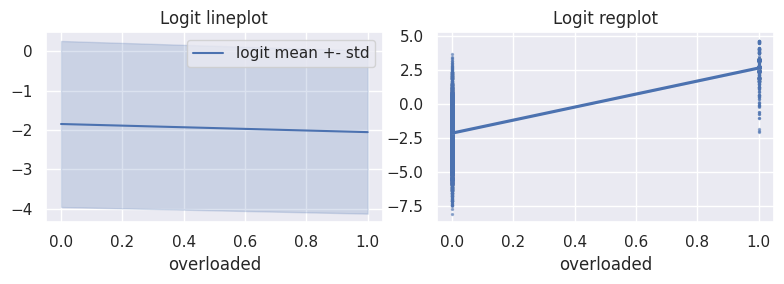

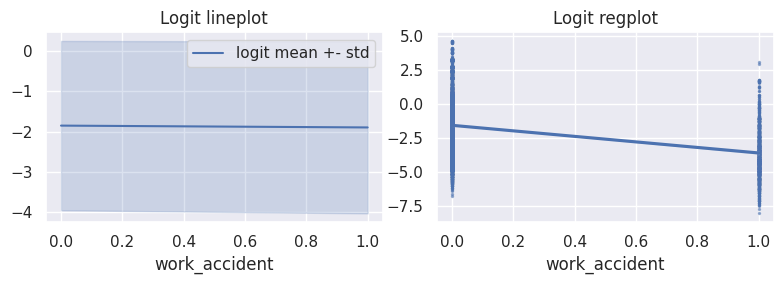

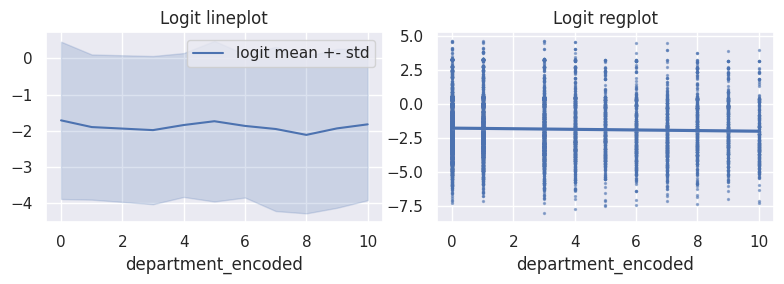

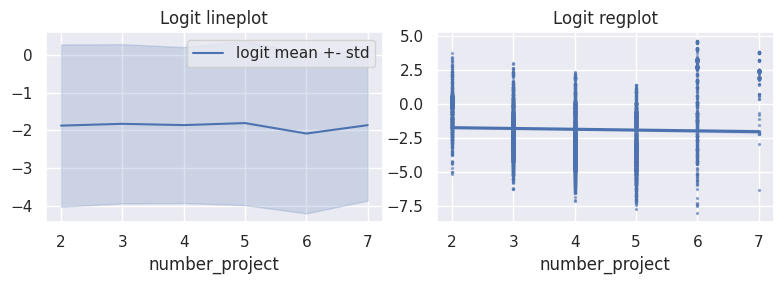

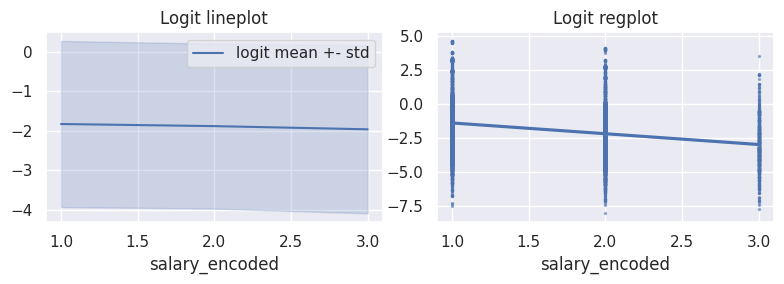

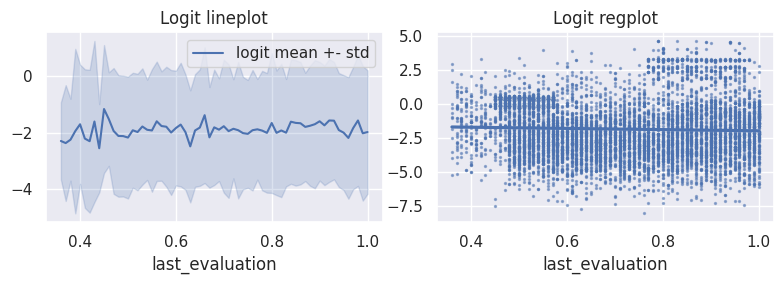

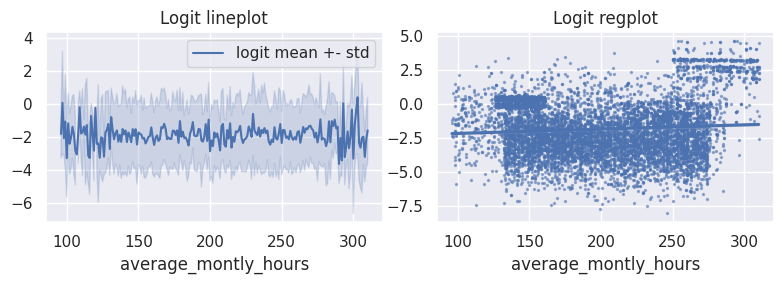

In [64]:
# X_train or X_train_scaled can be used for plotting
logistic_regression['logits'] = fnc.logistic_regression_logits(logistic_regression['probability'],  X['train'], list(X_features))

From the above plots we see the logistic regression model fulfills the linearity requirement between the logits (as Y) and the features.

So we have a valid model and we can try to improve it:
<ul>
    <li> Account for imbalance in categories of y in the training data</li>
    <li> Force an intercep term in the linear logit equation</li>
</ul>

For accounting for imbalance of the 2 categories in y in the logistic regression we have the parameter 'class_weightdict'. From the documentation:

        class_weightdict or ‘balanced’, default=None
        Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
        The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

From this we see that setting class_weightdict to 'balanced' should achieve out purpose.
  

# 7. MODEL TUNING: LOGISTIC CLASSIFICATION
Improve the model with hyperparameter

## Logistic Regression: Account for Imbalance in Y

## Instantiate and Fit:

In [65]:
logistic_regression['model_balanced'] = LogisticRegression(penalty='l2', max_iter=100, verbose=1, n_jobs=2, random_state=54,
                                                          class_weight='balanced')

In [66]:
%%time
logistic_regression['model_balanced'].fit(X['train_scaled'], y['train'])

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70391D+03    |proj g|=  5.69086D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     25     29      1     0     0   8.220D-03   3.233D+03
  F =   3233.3735366259484     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
CPU times: user 10.2 ms, sys: 222 µs, total: 10.4 ms
Wall time: 319 ms


 This problem is unconstrained.


LogisticRegression(class_weight='balanced', n_jobs=2, random_state=54,
                   verbose=1)

Explanation:
theta_i provides the specific contribution of feature i to the
variation    of log(odds) or log(P(Y=1) / P(Y=0)) in the equation:

             log(odds) = theta_vector dot X_vector

    The absolute value of theta provides a measure of the feature importance in the model


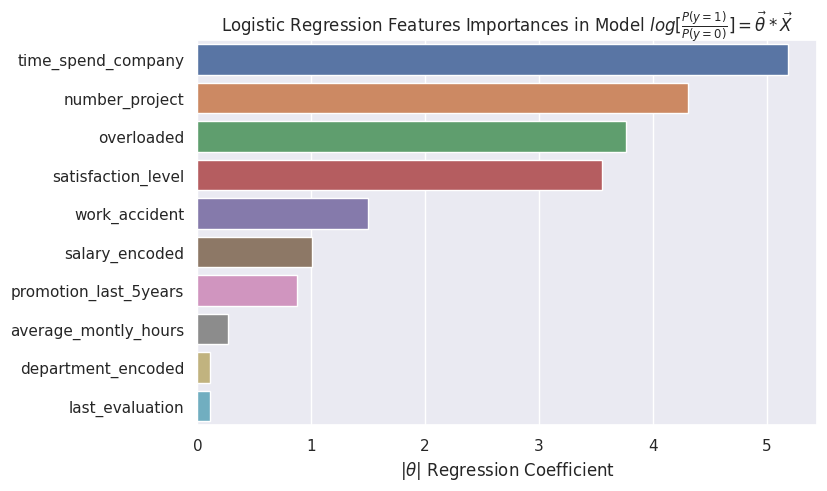

In [67]:
logistic_regression['coefficient_balanced'] = fnc.logistic_regression_feature_coeff_importance(logistic_regression['model_balanced'])

## Predict and Evaluate on Validation Set:

In [68]:
logistic_regression['y_valid_predict_balanced'] = logistic_regression['model_balanced'].predict(X['valid_scaled'])
logistic_regression['valid_balanced_scores'] = fnc.binary_classifier_scores(y_reference=y['valid'],
                                                                            y_prediction=logistic_regression['y_valid_predict_balanced'])
logistic_regression['valid_balanced_scores']

f1_score  accuracy_score  precision_score  recall_score
0  0.748596        0.853134         0.644468      0.892857

# 8. LOGISTIC CLASSIFICATION MODELS COMPARISON
Compare untuned and tuned logistic classifers on validation set

## Scores

In [69]:
modelscores = [logistic_regression['valid_balanced_scores'], logistic_regression['valid_scores']]
modelnames = ['Logistic Regression Balanced', 'Logistic Regression Imbalanced']
fnc.models_join_scores_tables(modelscores, modelnames)

f1_score  accuracy_score  precision_score  \
Logistic Regression Balanced    0.748596        0.853134         0.644468   
Logistic Regression Imbalanced  0.635906        0.841837         0.728846   

                                recall_score  
Logistic Regression Balanced        0.892857  
Logistic Regression Imbalanced      0.563988

In [70]:
modelscores = [logistic_regression['valid_balanced_scores']]
modelnames = ['Logistic Regression Balanced']
fnc.models_join_scores_tables(modelscores, modelnames).transpose()

Logistic Regression Balanced
f1_score                             0.748596
accuracy_score                       0.853134
precision_score                      0.644468
recall_score                         0.892857

## Feature Importances Logistic Regressions

In [73]:
logistic_regression['coefficient_balanced'][r'$|\theta|$']


time_spend_company       5.187681
number_project           4.306628
overloaded               3.762003
satisfaction_level       3.549970
work_accident            1.501220
salary_encoded           1.004319
promotion_last_5years    0.871327
average_montly_hours     0.265433
department_encoded       0.113474
last_evaluation          0.106568
Name: $|\theta|$, dtype: float64

In [74]:
logistic_regression['coefficient'][r'$|\theta|$']

overloaded               4.029583
number_project           3.991510
time_spend_company       3.982608
satisfaction_level       2.825021
work_accident            1.545698
promotion_last_5years    1.179621
salary_encoded           1.035034
average_montly_hours     0.295025
last_evaluation          0.154976
department_encoded       0.141118
Name: $|\theta|$, dtype: float64

In [75]:
modelnames

['Logistic Regression Balanced']

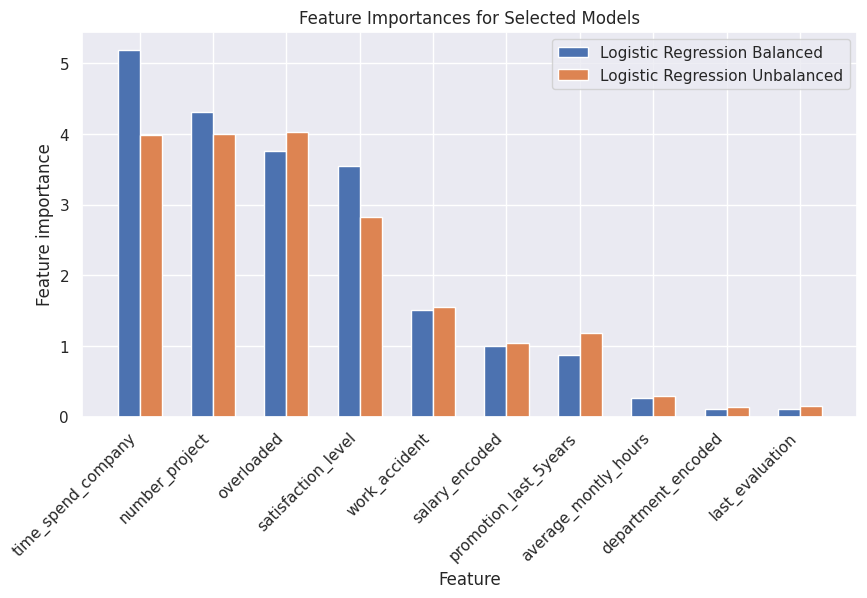

Logistic Regression Balanced  \
time_spend_company                         5.187681   
number_project                             4.306628   
overloaded                                 3.762003   
satisfaction_level                         3.549970   
work_accident                              1.501220   
salary_encoded                             1.004319   
promotion_last_5years                      0.871327   
average_montly_hours                       0.265433   
department_encoded                         0.113474   
last_evaluation                            0.106568   

                       Logistic Regression Unbalanced  
time_spend_company                           3.982608  
number_project                               3.991510  
overloaded                                   4.029583  
satisfaction_level                           2.825021  
work_accident                                1.545698  
salary_encoded                               1.035034  
promotion_last_5years                        1.179621  
average_montly_hours                         0.295025  
department_encoded                           0.141118  
last_evaluation                              0.154976

In [76]:
modelnames = ['Logistic Regression Balanced', 'Logistic Regression Unbalanced']
modelimportances = [logistic_regression['coefficient_balanced'][r'$|\theta|$'],
                    logistic_regression['coefficient'][r'$|\theta|$']]
fnc.compare_feature_importances(modelimportances, modelnames)

With the version of the model accounting for the imbalance of categories in the target variable we get an improvement of the recall (measure of false negatives) score, what we wanted, but traded with a degradation of precision (measure of false positives). The overall score f1 improved slightly.

Both models offer understandable influence of features on the predictions (correlation), either in intensity as in direction (sign of coefficients). Altough feature importances between models differ, the are still consistent: the most influential features (out of 10) for both models are the same but with cardinality differences.

NOTE: Both versions of the model were run exactly with the same parameters, included random_state, the only difference was the inclusion of the setting class_weight='balanced' for the  balanced model.

# 9. LOGISTIC CLASSIFICATION: GENERALIZATION OF ERROR ON TEST SET
Choose best of two models (tuned/untuned), predict on test set and make final evaluation of logistic classifier

### Get Prediction Scores on Test Set

In [78]:

X['test_scaled'] = pd.DataFrame(scaler.transform(X['test'][lX_features]))
X['test_scaled'].columns = lX_features

logistic_regression['y_test_predict_balanced'] = logistic_regression['model_balanced'].predict(X['test_scaled'])
logistic_regression['test_balanced_scores'] = fnc.binary_classifier_scores(y_reference=y['test'],
                                                                    y_prediction=logistic_regression['y_test_predict_balanced'])
modelscores = [logistic_regression['test_balanced_scores'],
               logistic_regression['valid_balanced_scores'],
               logistic_regression['valid_scores']]
modelnames = ['Logistic Regression Balanced on Test Set',
              'Logistic Regression Balanced on Validation Set',
              'Logistic Regression Imbalanced on Validation Set']
fnc.models_join_scores_tables(modelscores, modelnames)

f1_score  accuracy_score  \
Logistic Regression Balanced on Test Set          0.734719        0.841837   
Logistic Regression Balanced on Validation Set    0.748596        0.853134   
Logistic Regression Imbalanced on Validation Set  0.635906        0.841837   

                                                  precision_score  \
Logistic Regression Balanced on Test Set                 0.624091   
Logistic Regression Balanced on Validation Set           0.644468   
Logistic Regression Imbalanced on Validation Set         0.728846   

                                                  recall_score  
Logistic Regression Balanced on Test Set              0.893016  
Logistic Regression Balanced on Validation Set        0.892857  
Logistic Regression Imbalanced on Validation Set      0.563988

## Confusion Matrix for Best Model on Test Set

In [79]:
logistic_regression['cm_test'] =  metrics.confusion_matrix(y['test'], logistic_regression['y_test_predict_balanced'],
                                                           labels=logistic_regression['model_balanced'].classes_)
logistic_regression['cm_test']

array([[1709,  362],
       [  72,  601]])

In [80]:
logistic_regression['model_balanced'].classes_

array([0, 1])

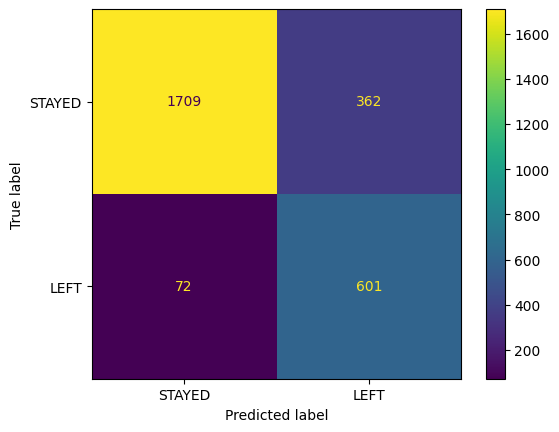

<Figure size 600x300 with 0 Axes>

In [81]:
import matplotlib
matplotlib.rc_file_defaults()
disp = ConfusionMatrixDisplay(confusion_matrix=logistic_regression['cm_test'],
                                      display_labels=['STAYED', 'LEFT'])
disp.plot()
plt.figure(figsize=(6,3))
plt.show()

/home/diego/Documents/EDUCATION/LEARNING/IT/BIG_DATA/GOOGLE/Advanced_Data_Analytics_Certificate/workspaces/pg1/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/diego/Documents/EDUCATION/LEARNING/IT/BIG_DATA/GOOGLE/Advanced_Data_Analytics_Certificate/workspaces/pg1/notebooks_final_project/functions_classifiers.py:377: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 600x300 with 0 Axes>

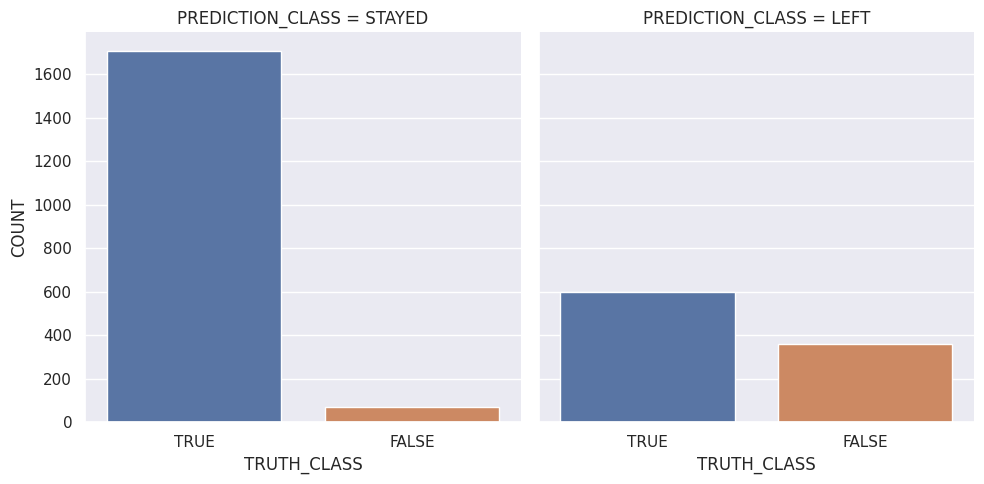

In [82]:
labels_dict = {'POSITIVE':'LEFT', 'NEGATIVE':'STAYED'}
sns.set()
logistic_regression['cm_table'] = fnc.cm_2_barplot(logistic_regression['cm_test'], labels_dict)

## **Logistic Regression Overall Evaluation**

The model predicts on the same data nearly equal as with the validation set. This tell us we can count on the model giving similar results with new data wich is similarly unbalanced (75/25).

<ul style=color:brown;font-weight:550;font-size:12pt>
    <li>The model is good at predicting negatives (STAYED). This is refelcted by a recall score of 0.89.</li>
    <li>The model is rather weak in predicting positives (LEFT). This has partially to do with the unbalanced nature of the data. This is reflected in a precision score of 0.64.</li>
    <li>Overall the model is acceptable, it predicts 85% of the data correctly (accuracy score).</li>
    <li>The <strong>F1-Score</strong>, which accounts for imbalances in precision and recall is a bit less optimistic than accuracy with a value of <strong>75%</strong>. This value can be taken as the overall performance of the model.</li>
    <li>The role of the features in the model is clear and can be interpreted according to common sense (see analyssi below).</li>
    <li>Trying another type of model is advisable to see if considerable improvements over this type of model can be achieved.</li>
    
</ul>

In [83]:
logistic_regression['coefficient']

$\theta$  $|\theta|$
overloaded             4.029583    4.029583
number_project        -3.991510    3.991510
time_spend_company     3.982608    3.982608
satisfaction_level    -2.825021    2.825021
work_accident         -1.545698    1.545698
promotion_last_5years -1.179621    1.179621
salary_encoded        -1.035034    1.035034
average_montly_hours  -0.295025    0.295025
last_evaluation       -0.154976    0.154976
department_encoded    -0.141118    0.141118

### **Feature Roles in Logisitc Classifer**

Considering the 4 most influential features and remembering $P_1$ is the probability of leaving and $P_0$ the probability of staying:
<ol style=color:brown;font-weight:550;font-size:12pt>
    <li><strong>time_spend_company</strong>: Observed: positive correlation between time and $log(P_1/P_0)$. With this variable I would expect that there exists a threshold where the correlation is positive and then negative. The data used comprehends only data between 2 and 10 years company belonging. No threshold can be observed.</li> 
    <li><strong>satisfaction_level</strong>: Observed: negative correlation. Expected: The happier an employee is with his job the lower the probability of leaving. Match.</li> 
    <li><strong>overloaded</strong>: Observed: positive correlation. Expected: Overloaded employees tend to leave. Match. </li>
    <li><strong>number_project</strong>: Observed: negative correlation. The model tells that this feature is not a measure of unhappiness but rather a retention factor: the more projects the higher the probability to stay.</li>

</ol>

# 10. TRY A TREE BASED MODEL
This type of models are good at overfitting and usually provide no clear explanation for human understanding between the relationships of features and target variable. Therefore I prefer to start with an explainable model like the logistic classification.

## Build Model: Random Forest
I select here a random forest from multiple weak decision trees in order to regularize overfitting and reduce influence of any erroneous data (bias)

### Preprocessing

#### Split in Train, Validation and Trest Sets

In [84]:
X, y = fnc.splitset_train_validation_test( df[list(X_features)], df['left'], test_size=0.2, validation_size=0.2, )

train set size: 0.5999733315554371 of original data set
Value distribution in y vector: 
 left
0    0.761862
1    0.238138
Name: proportion, dtype: float64

valid set size: 0.20001333422228149 of original data set
Value distribution in y vector: 
 left
0    0.762
1    0.238
Name: proportion, dtype: float64

test set size: 0.20001333422228149 of original data set
Value distribution in y vector: 
 left
0    0.762
1    0.238
Name: proportion, dtype: float64



#### Scale the Features

In [85]:
scaler = prepro.MinMaxScaler().fit(X['train'][lX_features])
temp_df = pd.DataFrame(scaler.transform(X['train'][lX_features]))

In [86]:
print('Number of features = {}\n'.format(len(X_features)))
print('Number of observations in train set = {}\n'.format(len(X['train'])))

Number of features = 10

Number of observations in train set = 8999



In [87]:
logistic_regression.keys()

dict_keys(['model', 'coefficient', 'y_valid_predict', 'valid_scores', 'probability', 'logits', 'model_balanced', 'coefficient_balanced', 'y_valid_predict_balanced', 'valid_balanced_scores', 'y_test_predict_balanced', 'test_balanced_scores', 'cm_test', 'cm_table'])

### Grid Search CV for Random Forest

In [88]:
rf_params = {
             #Tree parameters:
             'max_depth': [30, 50 ], # None puts no limit in depth. We have 10 features, so limit at nfeats*5
             'min_samples_leaf': [3,4,5], # ~9000 items in train set
    
             # Random forest parameters:
             'bootstrap': [True],
             'max_samples': [0.6, 0.7], # fraction of original data set to be used for bootstraping
             #'n_estimators': [50, 100], # number of decision trees
             'max_features': [0.5, 0.7], # number of fetures used in decision trees           
             }  

scoring = ['accuracy', 'precision', 'recall', 'f1']

random_forest = dict()
model_instance = RandomForestClassifier(class_weight='balanced',
                                        n_jobs=2,
                                        random_state=54,
                                        verbose=0)

random_forest['model_balanced'] = GridSearchCV(model_instance,
                                               rf_params,
                                               scoring = scoring,
                                               cv=3,
                                               refit="f1",
                                               verbose=1)

#### **About Cross Validation and Hyperparameters Tuning**
Single tree parameters combinations $ =3x2 = 6$

Random forest parameters combinations $ =2x2 = 4$

Cross validation folds $ = 3$

So mini-train sets for K-folds are about 3000 items long

Total model candidates $6x4=24$

Total fits to try = total model candidates $x$ cross validation folds $=72$

The CV results are a matrix with 24 rows (total model candidates) and each model candidate scores are means of the 3 CV-fits

#### Train the Random Forest with CV

In [89]:
%%time
random_forest['model_balanced'].fit(X['train'], y['train']) 

Fitting 3 folds for each of 24 candidates, totalling 72 fits
CPU times: user 40.6 s, sys: 1.07 s, total: 41.6 s
Wall time: 25.1 s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced', n_jobs=2,
                                              random_state=54),
             param_grid={'bootstrap': [True], 'max_depth': [30, 50],
                         'max_features': [0.5, 0.7], 'max_samples': [0.6, 0.7],
                         'min_samples_leaf': [3, 4, 5]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=1)

### Evaluate the Random Forest

In [90]:
random_forest['cv_results_balanced'] = fnc.cv_best_fit_summary(random_forest['model_balanced'])

Best score: 0.955135528995223

Best estimator: RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=0.7,
                       max_samples=0.7, min_samples_leaf=3, n_jobs=2,
                       random_state=54)

Best parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 0.7, 'max_samples': 0.7, 'min_samples_leaf': 3}



#### **Get the best estimator from cross validation according to F1-score**

In [91]:
random_forest['balanced_cv_best_scores'], random_forest['balanced_cv_best_params'], view_cv = fnc.cv_best_classifier_scores_params_ref_param(random_forest['model_balanced'], 'f1', rf_params)

Metrics to be extracted from .cv_results are:
 dict_values(['mean_test_f1', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall'])



In [92]:
random_forest['balanced_cv_best_scores']

f1_score  accuracy_score  precision_score  recall_score
0  0.955136        0.979331         0.988007      0.924399

In [93]:
random_forest['balanced_cv_best_params']['index_best_estimator_cv_results_']

data_frame_index
index_best_estimator_cv_results_                 9

In [94]:
random_forest['balanced_cv_best_params']['params']

max_depth min_samples_leaf bootstrap max_samples max_features
value        30                3      True         0.7          0.7

In [95]:
view_cv.head()

mean_test_f1  mean_test_accuracy  mean_test_precision  mean_test_recall  \
9       0.955136            0.979331             0.988007          0.924399   
21      0.955136            0.979331             0.988007          0.924399   
3       0.953201            0.978442             0.986019          0.922532   
15      0.953201            0.978442             0.986019          0.922532   
22      0.951801            0.977775             0.983568          0.922065   

   param_max_depth param_min_samples_leaf param_bootstrap param_max_samples  \
9               30                      3            True               0.7   
21              50                      3            True               0.7   
3               30                      3            True               0.7   
15              50                      3            True               0.7   
22              50                      4            True               0.7   

   param_max_features  
9                 0.7  
21                0.7  
3                 0.5  
15                0.5  
22                0.7

In [96]:
random_forest.keys()

dict_keys(['model_balanced', 'cv_results_balanced', 'balanced_cv_best_scores', 'balanced_cv_best_params'])

### **Run Selected Best Estimator from Cross Validation on Train Set**
It is necessary tu run the selected estimator independently in order to be able to make predictions. If we had selected the model.best_estimator_ this would not be necessary

In [97]:
columns = random_forest['balanced_cv_best_params']['params'].columns
row = random_forest['balanced_cv_best_params']['params'].iloc[0]
rf_params = dict(zip(columns, row))
rf_params

{'max_depth': 30,
 'min_samples_leaf': 3,
 'bootstrap': True,
 'max_samples': 0.7,
 'max_features': 0.7}

In [98]:
random_forest['cv_selected_forest_model'] = RandomForestClassifier(max_depth = 30,
                                                                   min_samples_leaf = 3,
                                                                   bootstrap = True,
                                                                   max_samples = 0.7,
                                                                   max_features = 0.7)

random_forest['cv_selected_forest_model'].fit(X['train'], y['train'])

RandomForestClassifier(max_depth=30, max_features=0.7, max_samples=0.7,
                       min_samples_leaf=3)

In [99]:
random_forest.keys()

dict_keys(['model_balanced', 'cv_results_balanced', 'balanced_cv_best_scores', 'balanced_cv_best_params', 'cv_selected_forest_model'])

## Evaluate Random Forest on Validation Set

In [100]:
random_forest['y_predict_valid_balanced'] = random_forest['cv_selected_forest_model'].predict(X['valid'])
random_forest['valid_balanced_scores'] = fnc.binary_classifier_scores(y_reference=y['valid'],
                                                                            y_prediction=random_forest['y_predict_valid_balanced'])


In [101]:
modelscores = [logistic_regression['test_balanced_scores'], random_forest['valid_balanced_scores']]
modelnames = ['Logistic Regression Balanced on Test Set', 'Random Forest Balanced on Validation Set']
fnc.models_join_scores_tables(modelscores, modelnames)

f1_score  accuracy_score  \
Logistic Regression Balanced on Test Set  0.734719        0.841837   
Random Forest Balanced on Validation Set  0.962644        0.982667   

                                          precision_score  recall_score  
Logistic Regression Balanced on Test Set         0.624091      0.893016  
Random Forest Balanced on Validation Set         0.988201      0.938375

In [102]:
logistic_regression.keys()

dict_keys(['model', 'coefficient', 'y_valid_predict', 'valid_scores', 'probability', 'logits', 'model_balanced', 'coefficient_balanced', 'y_valid_predict_balanced', 'valid_balanced_scores', 'y_test_predict_balanced', 'test_balanced_scores', 'cm_test', 'cm_table'])

## Evaluate Random Forest on Test Set

In [103]:
random_forest['y_predict_test_balanced'] = random_forest['cv_selected_forest_model'].predict(X['test'])
random_forest['test_balanced_scores'] = fnc.binary_classifier_scores(y_reference=y['test'],
                                                                            y_prediction=random_forest['y_predict_test_balanced'])

modelscores = [logistic_regression['test_balanced_scores'],
               random_forest['valid_balanced_scores'],
               random_forest['test_balanced_scores']]

modelnames = ['Logistic Regression Balanced on Test Set',
              'Random Forest Balanced on Validation Set',
              'Random Forest Balanced on Test Set']
fnc.models_join_scores_tables(modelscores, modelnames)

f1_score  accuracy_score  \
Logistic Regression Balanced on Test Set  0.734719        0.841837   
Random Forest Balanced on Validation Set  0.962644        0.982667   
Random Forest Balanced on Test Set        0.961733        0.982333   

                                          precision_score  recall_score  
Logistic Regression Balanced on Test Set         0.624091      0.893016  
Random Forest Balanced on Validation Set         0.988201      0.938375  
Random Forest Balanced on Test Set               0.992548      0.932773

### Confusion Matrix for Best Random Forest from Cross Validation on Test Set

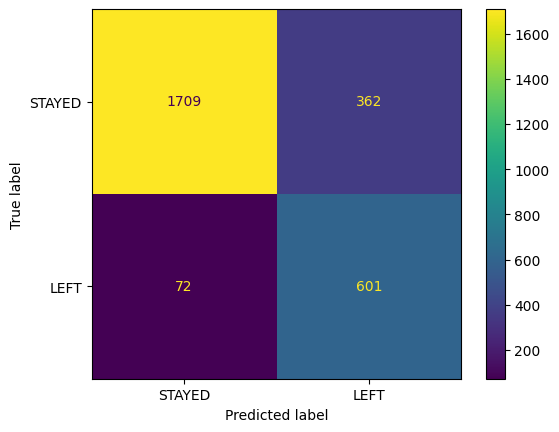

<Figure size 600x300 with 0 Axes>

/home/diego/Documents/EDUCATION/LEARNING/IT/BIG_DATA/GOOGLE/Advanced_Data_Analytics_Certificate/workspaces/pg1/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/diego/Documents/EDUCATION/LEARNING/IT/BIG_DATA/GOOGLE/Advanced_Data_Analytics_Certificate/workspaces/pg1/notebooks_final_project/functions_classifiers.py:377: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 600x300 with 0 Axes>

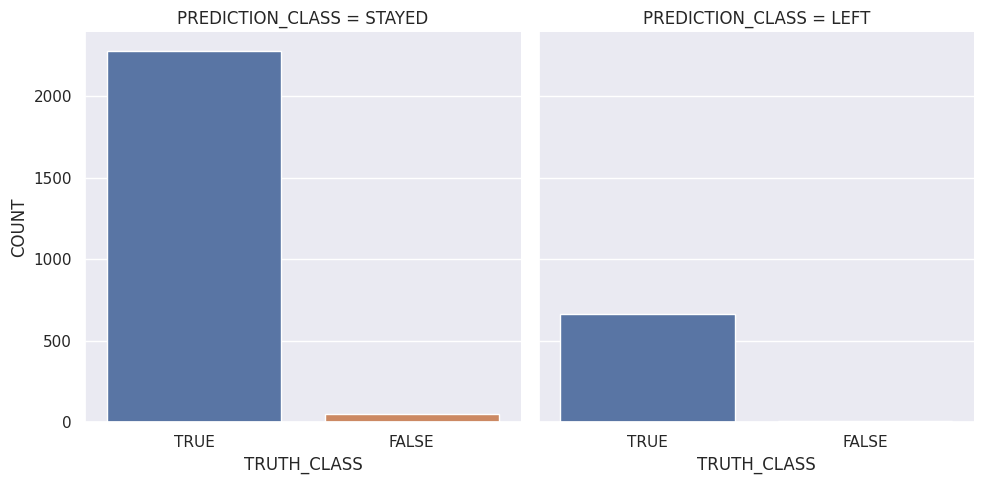

In [104]:
random_forest['cm_test'] =  metrics.confusion_matrix(y['test'], random_forest['y_predict_test_balanced'],
                                                           labels=random_forest['cv_selected_forest_model'].classes_)

matplotlib.rc_file_defaults()
disp = ConfusionMatrixDisplay(confusion_matrix=logistic_regression['cm_test'],
                                      display_labels=['STAYED', 'LEFT'])
disp.plot()
plt.figure(figsize=(6,3))
plt.show()

labels_dict = {'POSITIVE':'LEFT', 'NEGATIVE':'STAYED'}
sns.set()
random_forest['cm_table'] = fnc.cm_2_barplot(random_forest['cm_test'], labels_dict)

### Relative Feature Importances Best Random Forest

In [105]:
random_forest['cv_selected_feat_importances'] = fnc.table_feat_importance_native(random_forest['cv_selected_forest_model'])
random_forest['cv_selected_feat_importances']

feature_importance
satisfaction_level               0.432402
time_spend_company               0.155715
number_project                   0.148864
last_evaluation                  0.118723
average_montly_hours             0.094157
overloaded                       0.039238
department_encoded               0.006301
salary_encoded                   0.003786
work_accident                    0.000594
promotion_last_5years            0.000219

# 11. COMPARE BEST LOGISTIC CLASSIFIER WITH BEST RANDOM FOREST 

## Models' Scores

In [110]:
modelnames = ['Random Forest Balanced on Test Set', 'Logistic Regression Balanced on Test Set']
modelscores = [ random_forest['test_balanced_scores'], logistic_regression['test_balanced_scores']]
fnc.models_join_scores_tables(modelscores, modelnames)

f1_score  accuracy_score  \
Random Forest Balanced on Test Set        0.961733        0.982333   
Logistic Regression Balanced on Test Set  0.734719        0.841837   

                                          precision_score  recall_score  
Random Forest Balanced on Test Set               0.992548      0.932773  
Logistic Regression Balanced on Test Set         0.624091      0.893016

## Feature Importances Comparison
**NOTE:** The values used for plotting and sisplayed in the table below are normalized to the respective means in order to get
a similar rage of values. The logisitc classifier importances values are the absolute values of the feature coefficients while for the
random forest are the relative importances calculated by the model.

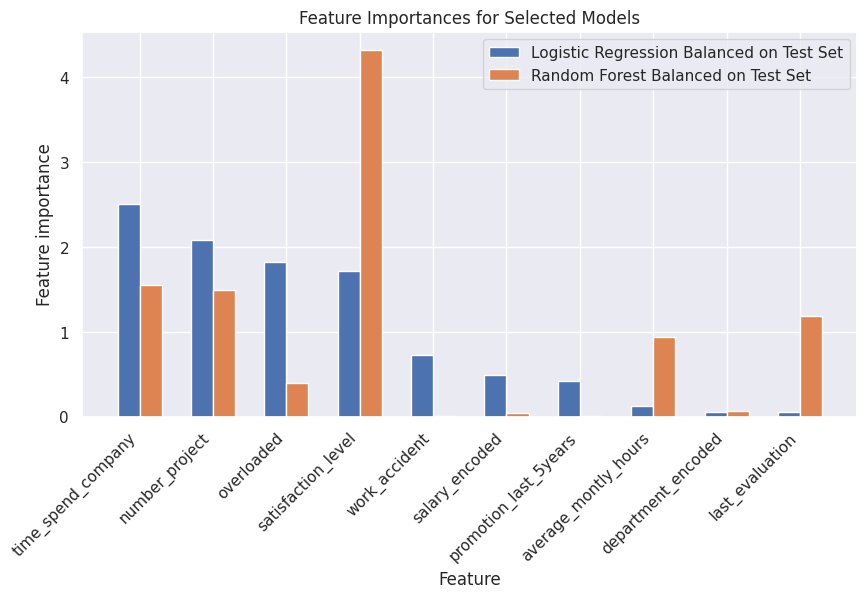

Logistic Regression Balanced on Test Set  \
time_spend_company                                     2.509931   
number_project                                         2.083655   
overloaded                                             1.820152   
satisfaction_level                                     1.717565   
work_accident                                          0.726328   
salary_encoded                                         0.485915   
promotion_last_5years                                  0.421570   
average_montly_hours                                   0.128423   
department_encoded                                     0.054901   
last_evaluation                                        0.051560   

                       Random Forest Balanced on Test Set  
time_spend_company                               1.557152  
number_project                                   1.488642  
overloaded                                       0.392379  
satisfaction_level                               4.324015  
work_accident                                    0.005943  
salary_encoded                                   0.037861  
promotion_last_5years                            0.002194  
average_montly_hours                             0.941568  
department_encoded                               0.063012  
last_evaluation                                  1.187233

In [107]:
modelimportances = [logistic_regression['coefficient_balanced'][r'$|\theta|$']/np.mean(logistic_regression['coefficient_balanced'][r'$|\theta|$']),
                    random_forest['cv_selected_feat_importances']/np.mean(random_forest['cv_selected_feat_importances'])]
modelnames = ['Logistic Regression Balanced on Test Set',
              'Random Forest Balanced on Test Set']
fnc.compare_feature_importances(modelimportances, modelnames)

/home/diego/Documents/EDUCATION/LEARNING/IT/BIG_DATA/GOOGLE/Advanced_Data_Analytics_Certificate/workspaces/pg1/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/diego/Documents/EDUCATION/LEARNING/IT/BIG_DATA/GOOGLE/Advanced_Data_Analytics_Certificate/workspaces/pg1/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_18799/2547487767.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


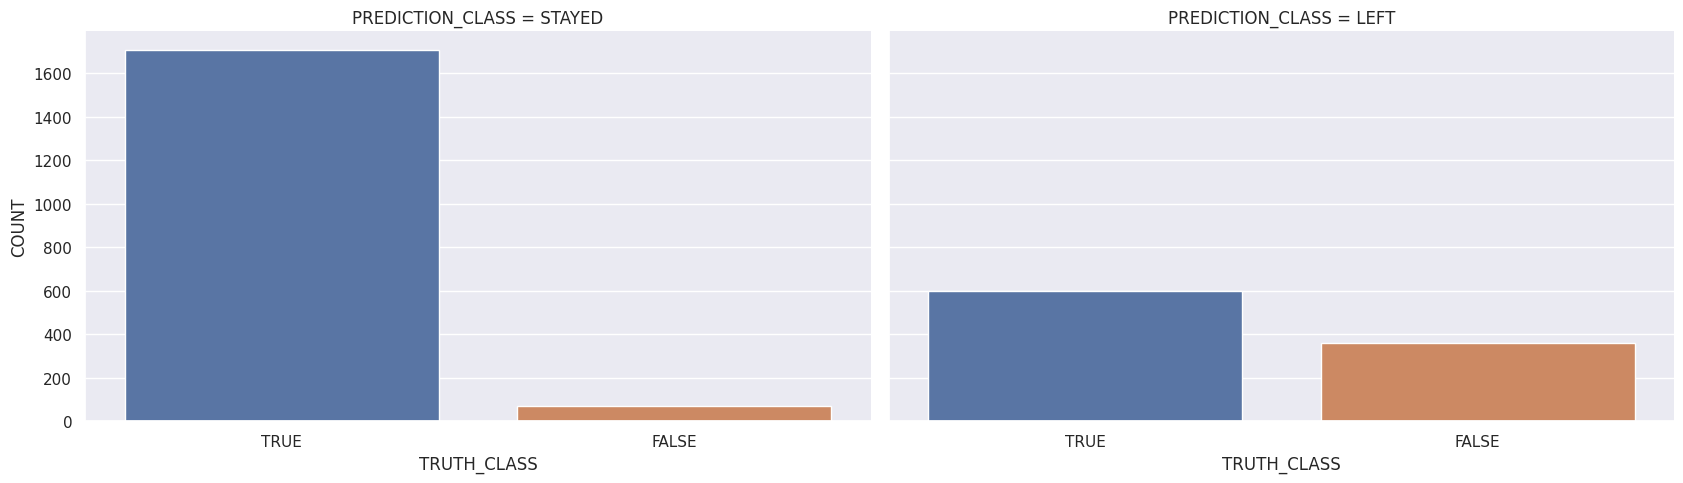

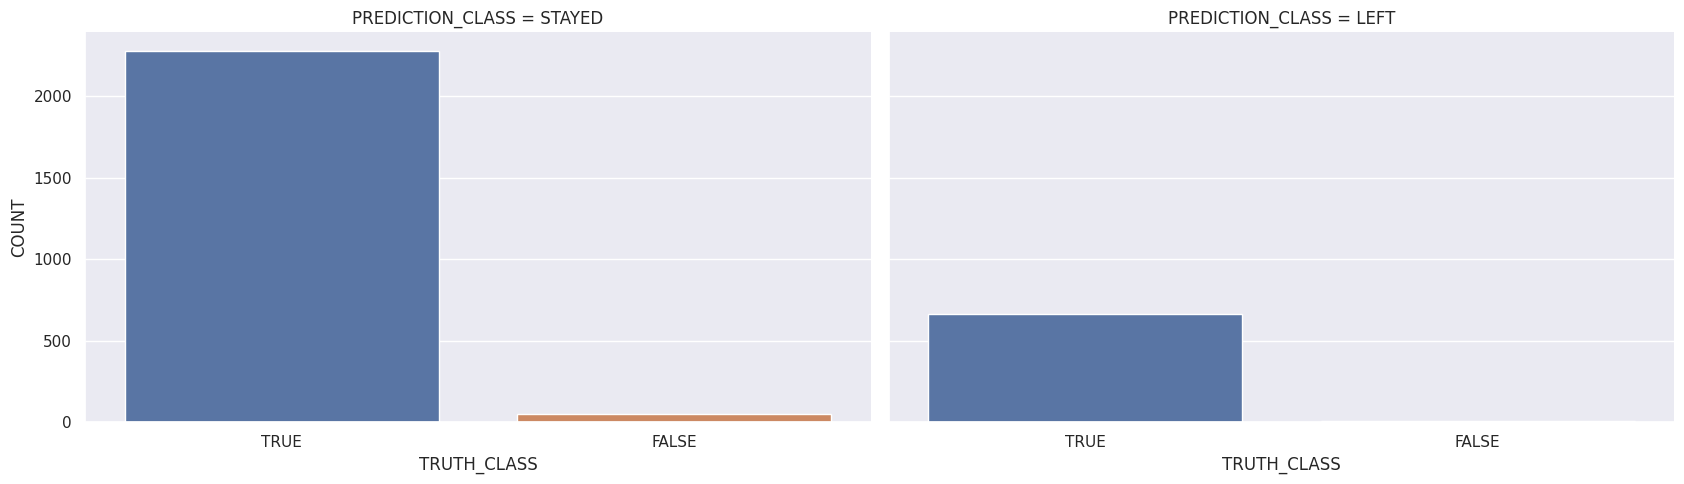

In [108]:

for table in [logistic_regression['cm_table'], random_forest['cm_table']]:
    #plt.figure(figsize=(4,4))
    sns.catplot(data=table,
                col= 'PREDICTION_CLASS',
                y='COUNT',
                x='TRUTH_CLASS',
                kind='bar',
                aspect=1.7,
                )
    
plt.tight_layout()
#plt.title('CM Data for {}'.format(modelnames))
plt.show()

# **CONCLUSIONS**

<ul style=color:brown;font-weight:550;font-size:12pt>
    <li>From the generalization of errors on the test sets, the <strong>random forest is a better model than the logistic
        classifer</strong></li>
    <li>The main difference is the <strong>much better precision</strong> (accounts for false positives) of the random forest</li>
    <li>Recall of both models is similar but the random forest is also a bit stronger here</li>
    <li>The feature importances in the random forest are <strong>much concentrated on some features, specially on
        'satisfaction_level'</strong></li>
    <li>The logistic classifier distributes more smoothly the feature importances and is also able to show howeach of them contributes
    to the cahnge in the target feature</li>
    <li>For both models, among the 4 most important features are: <strong>'time_spend_company', 'number_project', 'satisfaction_level'
    </strong></li>
    <li>For the logisitc classifer also 'overloaded' is quite important</li>
    <li>For the random forest 'last_evaluation' and 'average_montly_hours'</li>
    <li>Surprisingly 'salary_encoded' is not a predominant feature for none of the models</li>    
</ul>

# **RECOMMENDATIONS**

<ul style=color:brown;font-weight:550;font-size:12pt>
    <li> The random forest can be put in production</li>
    <li>The exagerated dependence of results of the random forest on a single variable might make the model prone to overreactions
    to imprecise/erroneous data</li>
</ul>